# Notebook para analises exploratorio de los datos

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
# From the repository of the dataset, we import the function that
# loads the fluorescence dataset
from src.load_dataset import load_fluorescence

In [11]:
fluorescence = load_fluorescence('data',as_frame=True)
df = fluorescence.frame
df['label_name'] = df.label.replace(fluorescence.label_map)
df['diet_name'] = df.diet.replace(fluorescence.diet_map)

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_82690/514215656.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['label_name'] = df.label.replace(fluorescence.label_map)
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_82690/514215656.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['diet_name'] = df.diet.replace(fluorescence.diet_map)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175211 entries, 0 to 175210
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   diet        175211 non-null  category
 1   mouse       175211 non-null  int64   
 2   take        175211 non-null  int64   
 3   row         175211 non-null  int64   
 4   col         175211 non-null  int64   
 5   Ca          175211 non-null  float64 
 6   Cu          175211 non-null  float64 
 7   Fe          175211 non-null  float64 
 8   K           175211 non-null  float64 
 9   Mn          175211 non-null  float64 
 10  P           175211 non-null  float64 
 11  S           175211 non-null  float64 
 12  Zn          175211 non-null  float64 
 13  label       23003 non-null   category
 14  label_name  23003 non-null   category
 15  diet_name   175211 non-null  category
dtypes: category(4), float64(8), int64(4)
memory usage: 16.7 MB


In [13]:
# Estadísticas descriptivas del dataframe de cada columna
df.describe()

mouse           take            row            col  \
count  175211.000000  175211.000000  175211.000000  175211.000000   
mean       17.427559       0.106540      41.100741      40.680973   
std        11.459746       0.308529      28.058009      28.110678   
min         1.000000       0.000000       0.000000       0.000000   
25%         7.000000       0.000000      18.000000      18.000000   
50%        15.000000       0.000000      37.000000      36.000000   
75%        28.000000       0.000000      61.000000      60.000000   
max        39.000000       1.000000     117.000000     120.000000   

                 Ca            Cu            Fe             K            Mn  \
count  1.752110e+05  1.752110e+05  1.752110e+05  1.752110e+05  1.752110e+05   
mean   1.375511e+09  7.559693e+06  1.300203e+08  7.021223e+06  2.011924e+07   
std    1.504605e+09  9.586318e+06  1.804093e+08  1.617595e+07  3.362677e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.184645e+08  5.164515e+05  4.481730e+07  0.000000e+00  4.684340e+06   
50%    8.743000e+08  5.114860e+06  7.804350e+07  0.000000e+00  1.026760e+07   
75%    1.653060e+09  1.061500e+07  1.295140e+08  8.618140e+06  1.793230e+07   
max    1.159470e+10  1.778380e+08  6.922760e+09  4.589360e+08  2.994300e+08   

                  P             S            Zn  
count  1.752110e+05  1.752110e+05  1.752110e+05  
mean   6.744482e+06  2.738555e+07  6.989112e+07  
std    1.659421e+07  4.814614e+07  9.473747e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  2.482850e+07  
50%    0.000000e+00  1.277800e+07  4.565720e+07  
75%    7.250180e+06  3.291800e+07  7.712515e+07  
max    3.002360e+08  6.180620e+08  1.513270e+09

In [14]:
# Datos únicos por columna
a=df['take'].unique()
print(f'numero de dietas unicas: {df.diet_name.unique()}')
print(f'numero de ratones unicos: {df.mouse.unique()}')
print(f'numero de tomas unicas: {a}')
print(f'numero de etiquetas unicas: {df.label_name.unique()}')

numero de dietas unicas: ['omega6', 'control', 'omega3']
Categories (3, object): ['control', 'omega3', 'omega6']
numero de ratones unicos: [25 14 19 15 23 16 20 17 18 26 21  2 12  9  8  4 10  7  1 11  6 32 28 29
 33 36 38 35 39 37 30 31 27]
numero de tomas unicas: [0 1]
numero de etiquetas unicas: [NaN, 'no sample', 'no label', 'tumoral B', 'tumoral A', ..., 'blood', 'artifacts', 'dense connective tissue', 'tumoral C', 'paraffin']
Length: 11
Categories (10, object): ['no label', 'tumoral A', 'tumoral B', 'tumoral C', ..., 'loose connective tissue', 'no sample', 'dense connective tissue', 'paraffin']


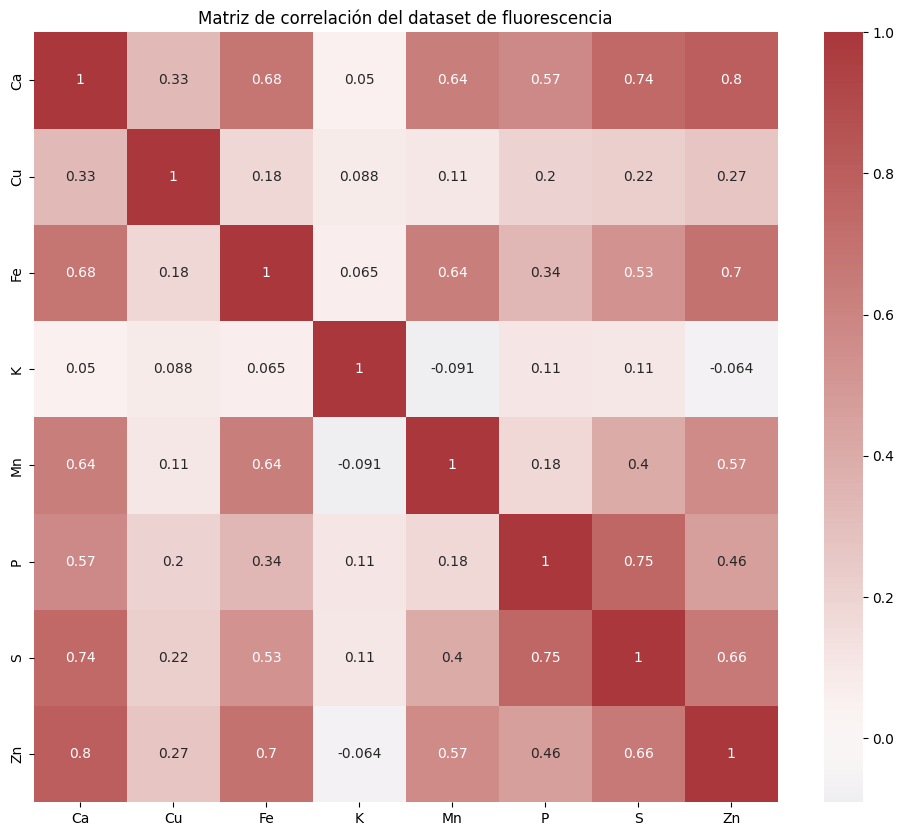

In [15]:
# Matriz de correlación considerando las variables de interés y la etiqueta 'label'
correlation_matrix = df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0)
plt.title('Matriz de correlación del dataset de fluorescencia')
plt.show()

In [16]:
#correlation_with_target = df[['diet', 'Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']].corr()['diet'].sort_values(ascending=False)
#print("Coeficientes de correlación con la variable objetivo:")
#print(correlation_with_target)

<Figure size 1200x800 with 0 Axes>

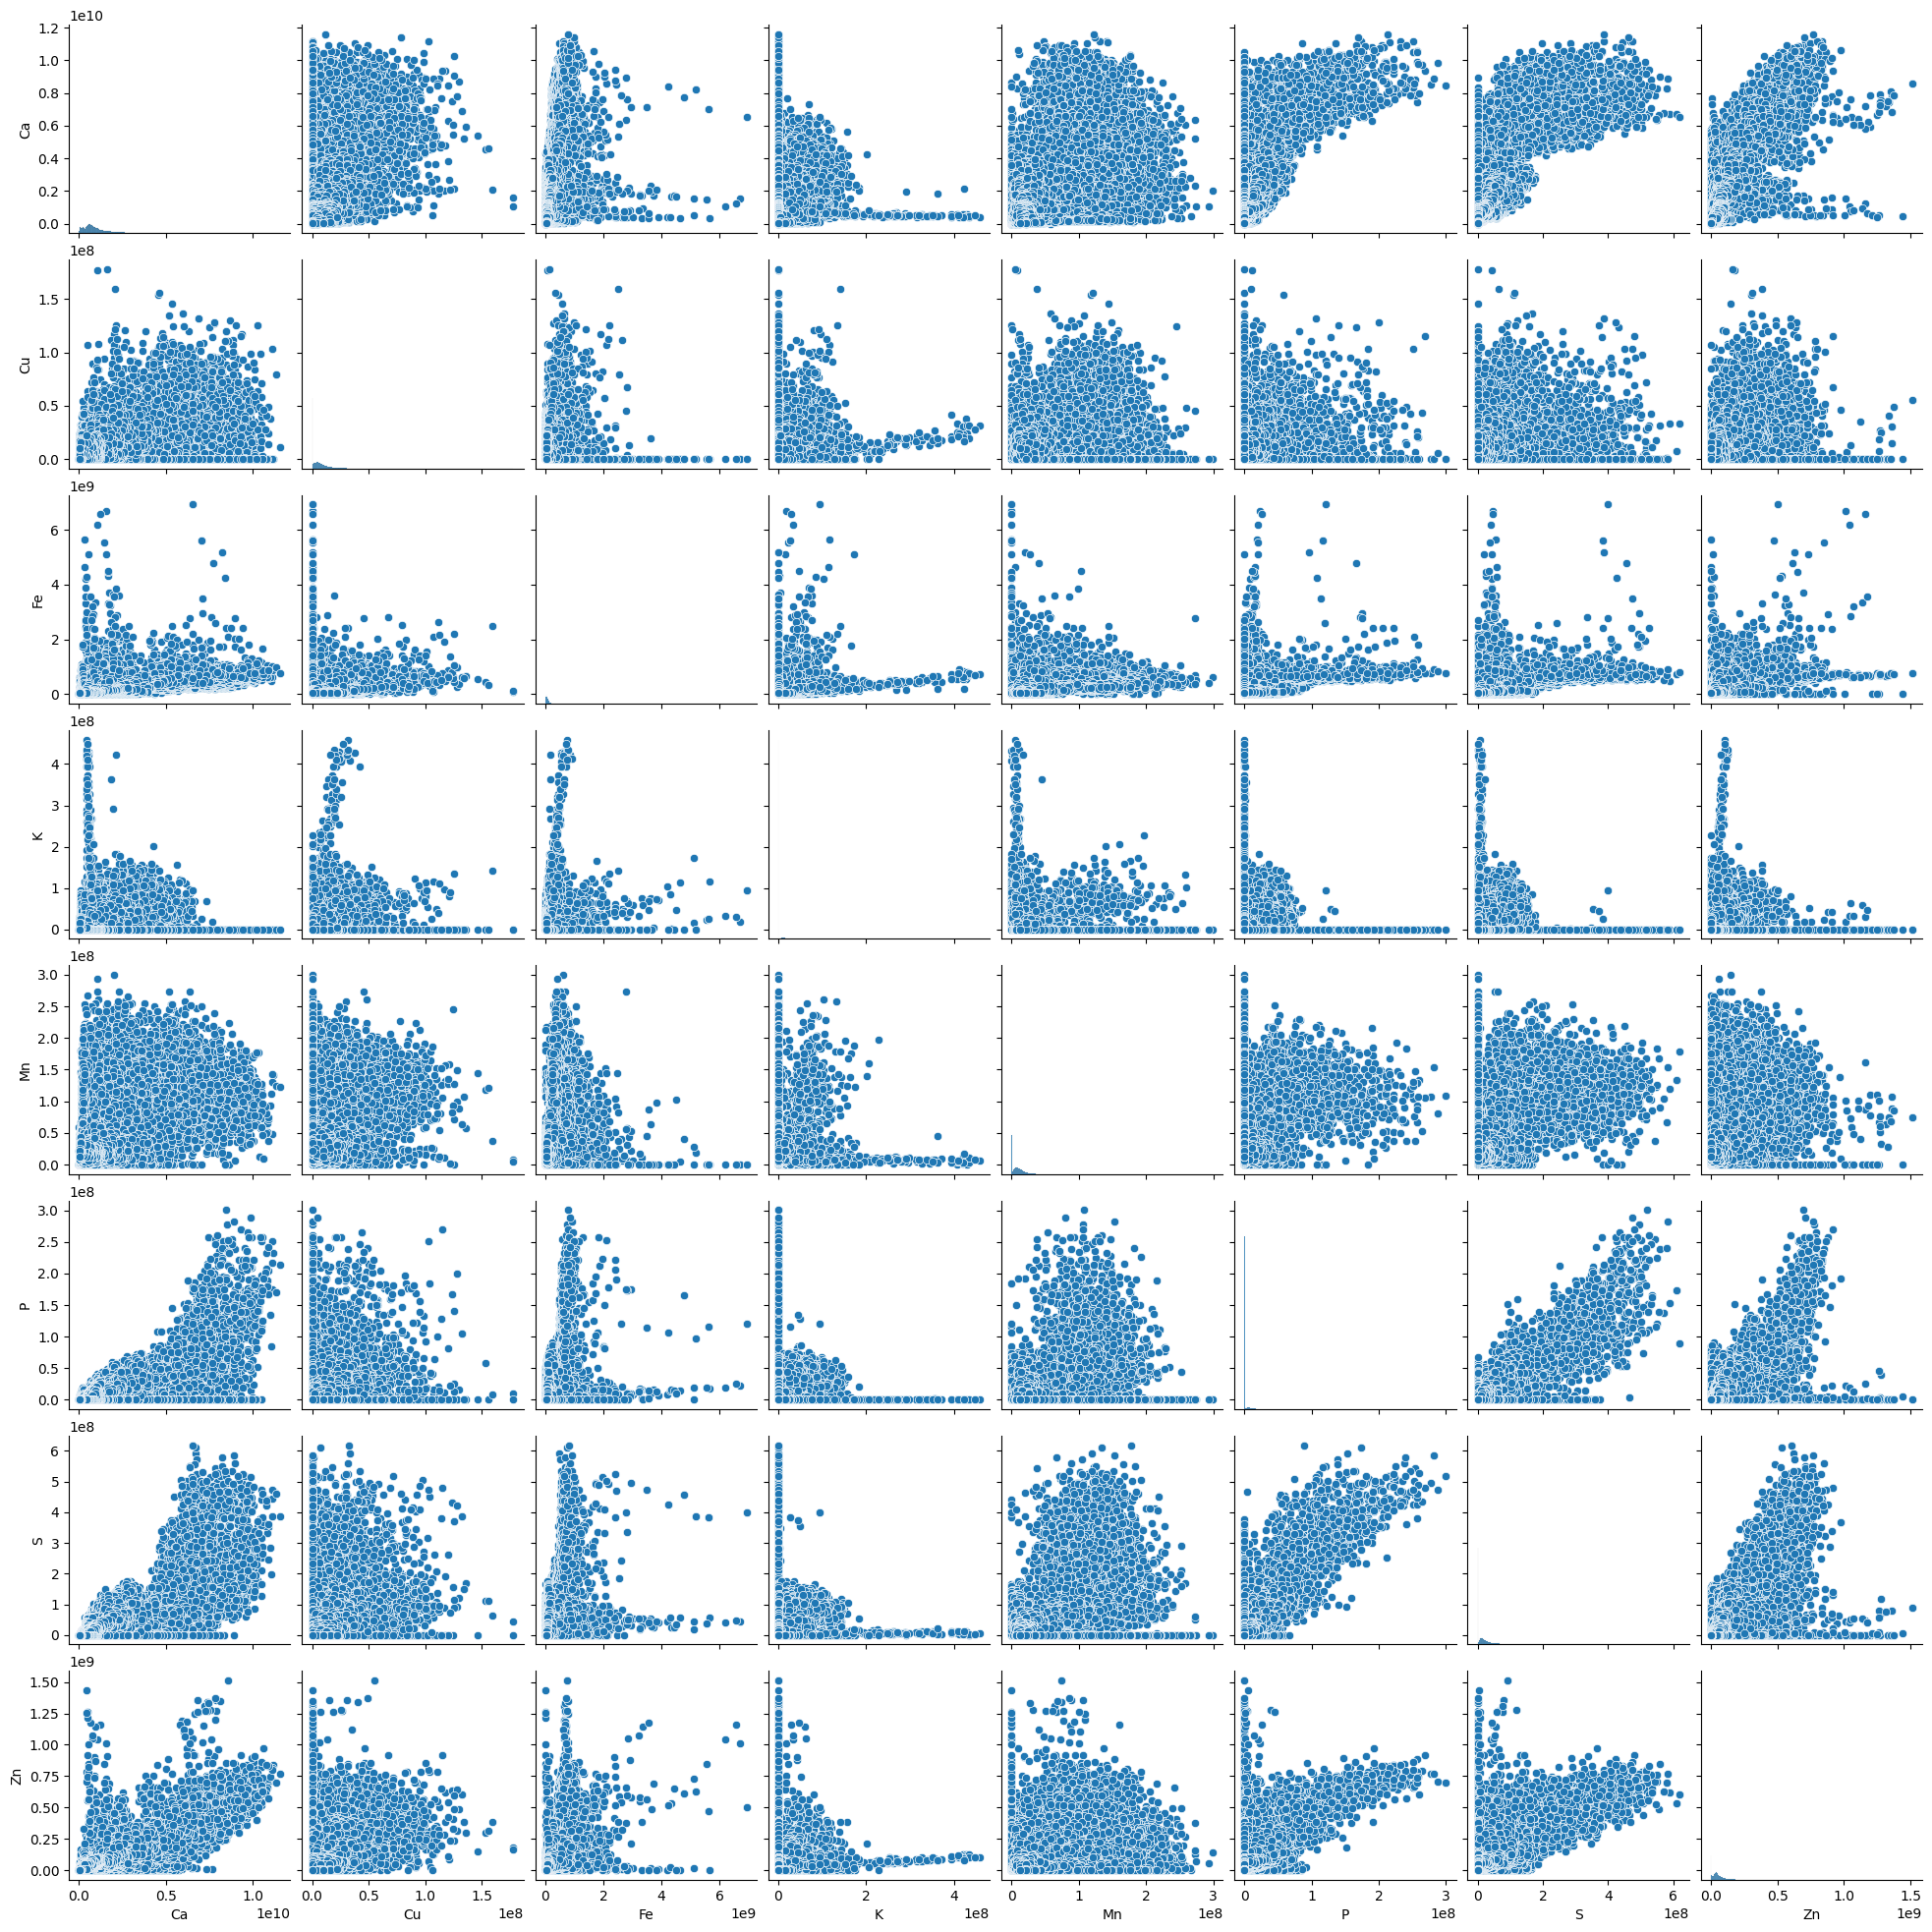

In [17]:
# Gráfico de dispersión de las variables de interés
plt.figure(figsize=(12, 8))
sns.pairplot(data=df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn']])

In [18]:
df_interesting= df[['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn','label']].copy()
df_interesting[df_interesting==0].count(axis=0)

Ca           18
Cu        40210
Fe          783
K        119257
Mn        22779
P        102985
S         57251
Zn        11770
label     10102
dtype: int64

In [19]:
df_interesting[df_interesting==None].count(axis=0)

Ca       0
Cu       0
Fe       0
K        0
Mn       0
P        0
S        0
Zn       0
label    0
dtype: int64

<Axes: >

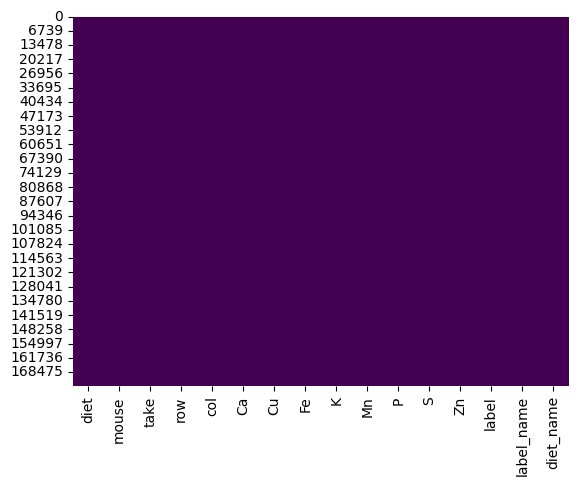

In [20]:
sns.heatmap(df==None, cbar=False, cmap='viridis')

<Axes: >

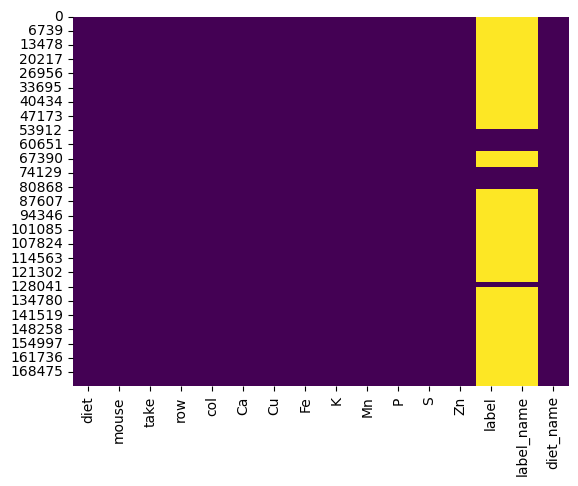

In [21]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

<Axes: >

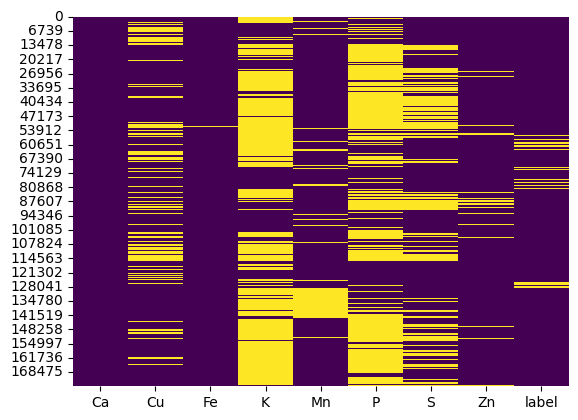

In [22]:
sns.heatmap(df_interesting==0, cbar=False, cmap='viridis')

Podemos observar que existen algunas estructuras de datos con valores 0 en el dataframe para las columnas de fluorecencia de elementos quimicos, y ademas observamos las filas estan con una clasificacion realizadas considerando la columna 'label'. 
Vamos a eliminar los ceros de cada una de las columnas de los elementos quimicos, ya que entendemos de los valores 0 en relacion a la fluorecencia de los elementos quimicos no nos aporta información relevante. 
Para realizar eso valor separar el dataframe original, en submuestras considerando los elementos quimicos de la fluorescencia.


**OPCIONAL**: Ademas vamos a analisar si es posible realizar otra limpieza, considerando las imagens de fluorecencia los elementos quimicos podemos observar que el 'mapcolor' el valor de baja fluorecencia no aporte datos relevantes y que ademas los datos ruidosos estan en el mismo range de intensidad por lo que decidimos filtrar tambien esos datos.

In [23]:
for i in df.label.unique():
    a= df[df.label == i].shape[0]
    print(f'{i}: {a}')

nan: 0
8.0: 2969
0.0: 10102
3.0: 4042
2.0: 3905
7.0: 804
6.0: 100
5.0: 367
9.0: 566
4.0: 26
10.0: 122


Podemos observar que no todos los datos tienen etiquetas associadas. Vamos a escoger las siguientes etiquetas para analizar porque creemos que está relacionada a posibles anomalias en el analisis histologicos. 
- 0: 'no-label' -- DESCARTADA
- 1: 'necrotic tissue' -- DESCARTADA PORQUE NO EXISTE ESA ETIQUETA
- 2: 'tumoral A'
- 3: 'tumoral B'
- 4: 'tumoral C'
- 5: 'artifacts'
- 6: 'blood'
- 7: 'loose connective tissue'
- 8: 'no sample' -- DESCARTADA
- 9: 'dense connective tissue'
- 10: 'paraffin' -- DESCARTADA


In [39]:
labels_interesting = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]

In [40]:
# Filtramos los datos para cada elemento químico y creamos un DataFrame con las columnas relevantes
df_label_Ca = df[df['Ca'] > 0][['diet_name','Ca','label_name','diet','label']]
df_label_Cu = df[df['Cu'] > 0][['diet_name','Cu','label_name','diet','label']]
df_label_Fe = df[df['Fe'] > 0][['diet_name','Fe','label_name','diet','label']]
df_label_K = df[df['K'] > 0][['diet_name','K','label_name','diet','label']]
df_label_Mn = df[df['Mn'] > 0][['diet_name','Mn','label_name','diet','label']]
df_label_P = df[df['P'] > 0][['diet_name','P','label_name','diet','label']]
df_label_S = df[df['S'] > 0][['diet_name','S','label_name','diet','label']]
df_label_Zn = df[df['Zn'] > 0][['diet_name','Zn','label_name','diet','label']]

<Axes: >

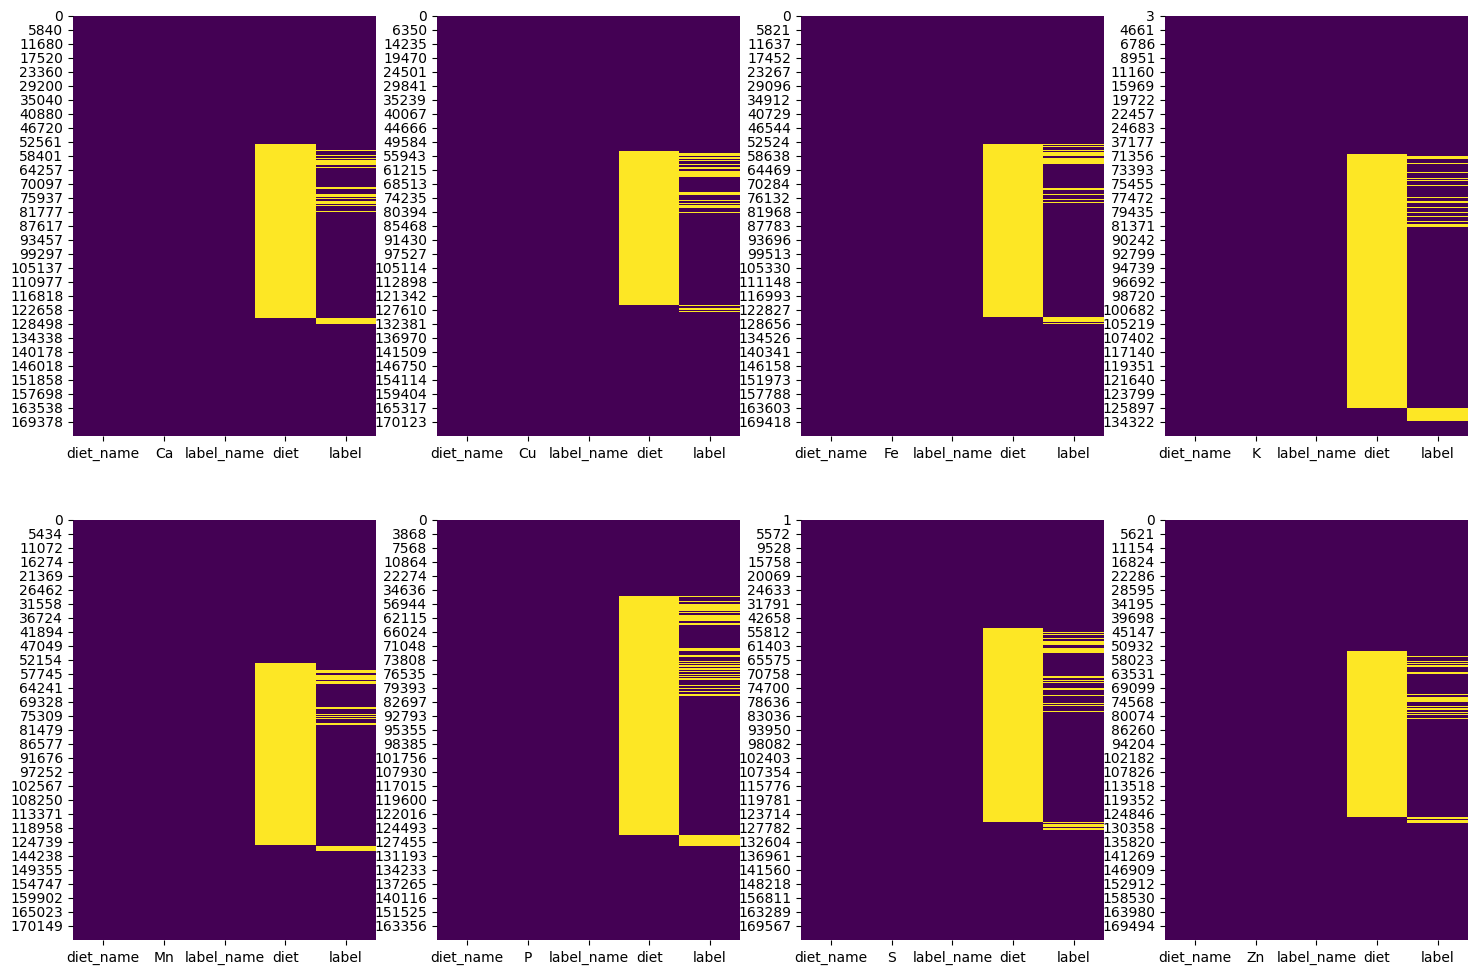

In [41]:
# Visualización de la presencia de etiquetas
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
sns.heatmap(df_label_Ca==0, cbar=False, cmap='viridis', ax=axs[0][0])
sns.heatmap(df_label_Cu==0, cbar=False, cmap='viridis', ax=axs[0][1])
sns.heatmap(df_label_Fe==0, cbar=False, cmap='viridis', ax=axs[0][2])
sns.heatmap(df_label_K==0, cbar=False, cmap='viridis', ax=axs[0][3])
sns.heatmap(df_label_Mn==0, cbar=False, cmap='viridis', ax=axs[1][0])
sns.heatmap(df_label_P==0, cbar=False, cmap='viridis', ax=axs[1][1])
sns.heatmap(df_label_S==0, cbar=False, cmap='viridis', ax=axs[1][2])
sns.heatmap(df_label_Zn==0, cbar=False, cmap='viridis', ax=axs[1][3])

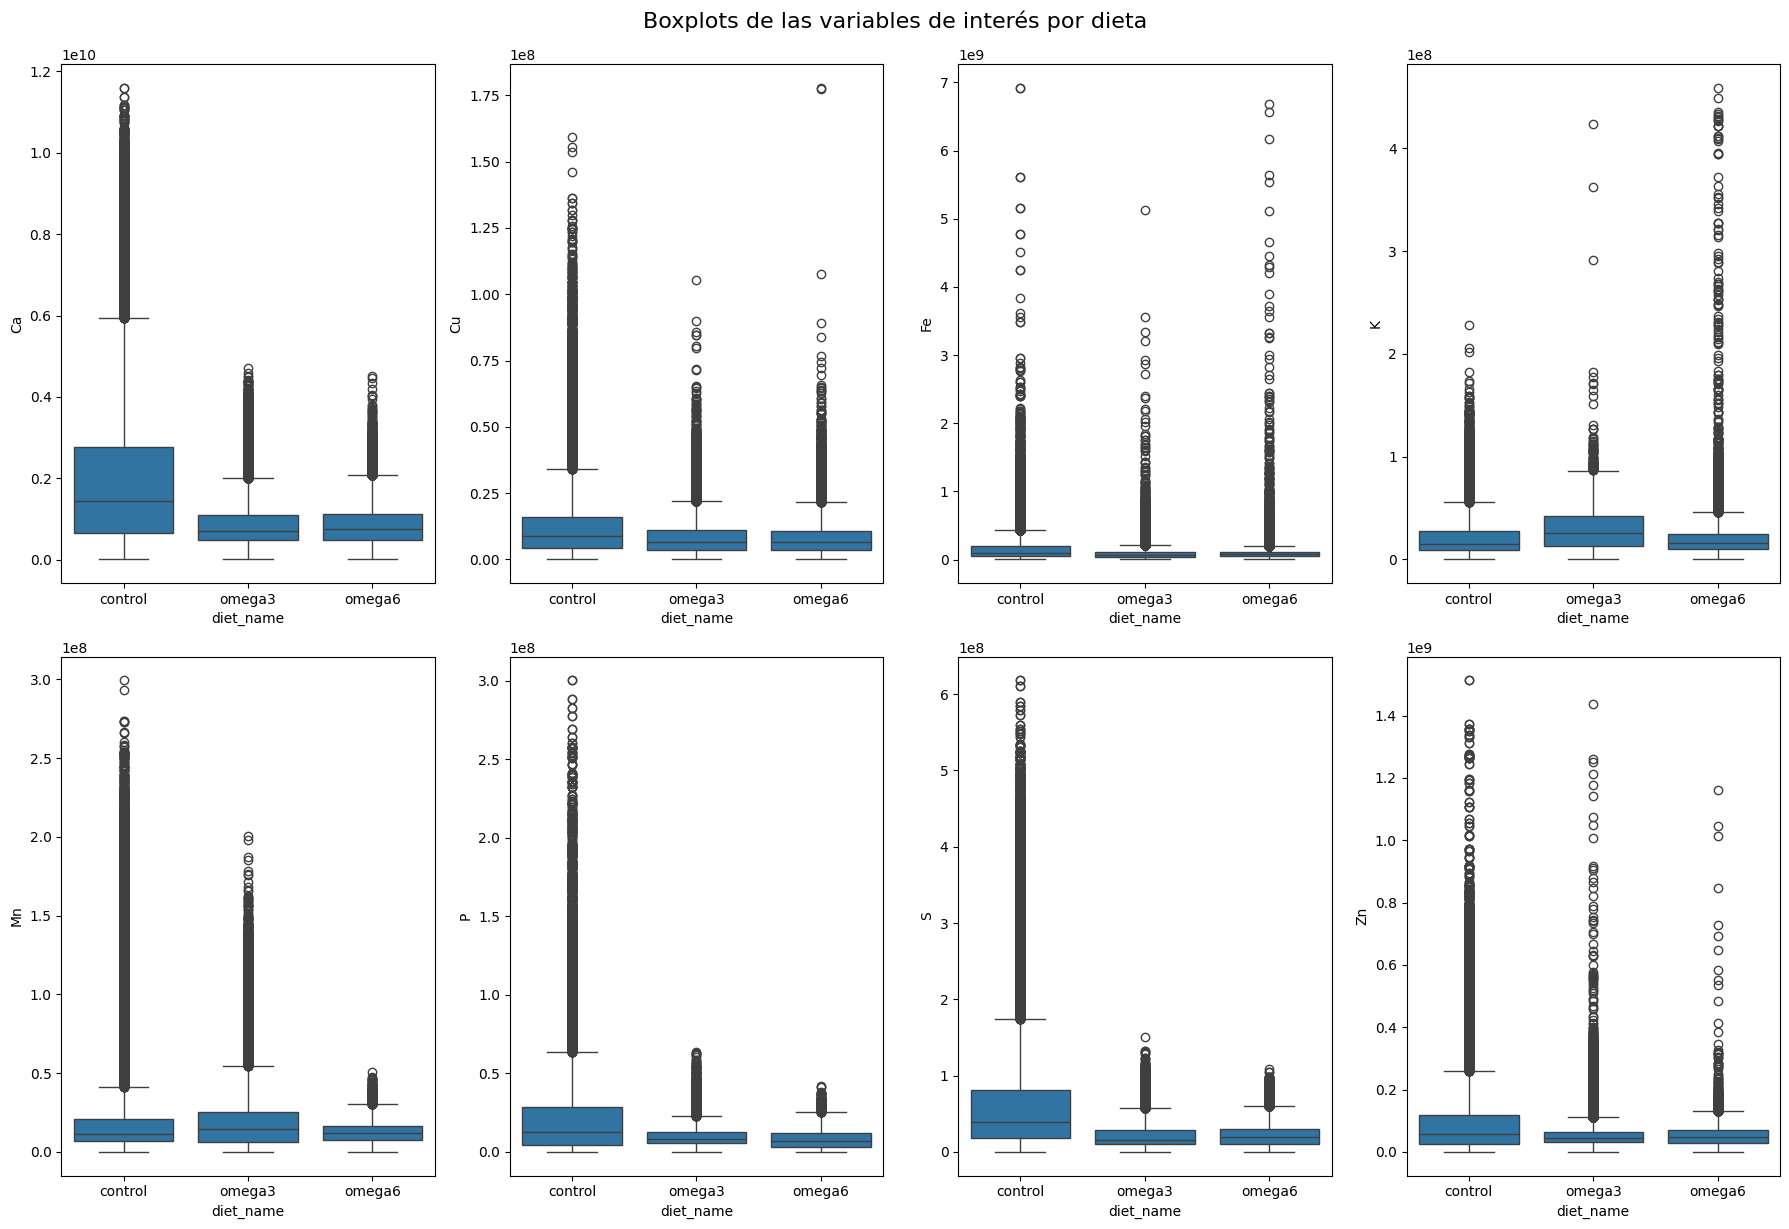

In [42]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta 

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
sns.boxplot(data=df_label_Ca, x='diet_name', y='Ca', ax=axs[0][0])
sns.boxplot(data=df_label_Cu, x='diet_name', y='Cu', ax=axs[0][1])
sns.boxplot(data=df_label_Fe, x='diet_name', y='Fe', ax=axs[0][2])
sns.boxplot(data=df_label_K, x='diet_name', y='K', ax=axs[0][3])
sns.boxplot(data=df_label_Mn, x='diet_name', y='Mn', ax=axs[1][0])
sns.boxplot(data=df_label_P, x='diet_name', y='P', ax=axs[1][1])
sns.boxplot(data=df_label_S, x='diet_name', y='S', ax=axs[1][2])
sns.boxplot(data=df_label_Zn, x='diet_name', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las variables de interés por dieta', fontsize=16, y=1.02)
plt.show()

In [107]:
from scipy import stats

# Lista de dataframes y variables correspondientes
dfs = [
    (df_label_Ca, 'Ca'),
    (df_label_Cu, 'Cu'),
    (df_label_Fe, 'Fe'),
    (df_label_K, 'K'),
    (df_label_Mn, 'Mn'),
    (df_label_P, 'P'),
    (df_label_S, 'S'),
    (df_label_Zn, 'Zn')
]

alpha = 0.05

for df_elem, var in dfs:
    print(f"\nResultados t-test para {var}:")
    # Obtener los grupos únicos de dieta
    grupos = [df_elem[df_elem['diet_name'] == d][var] for d in df_elem['diet_name'].unique()]
    dietas = df_elem['diet_name'].unique()
    # Comparar cada par de grupos
    for i in range(len(grupos)):
        for j in range(i+1, len(grupos)):
            stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
            resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
            print(f"Dieta {dietas[i]} vs Dieta {dietas[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")


Resultados t-test para Ca:
Dieta omega6 vs Dieta control: statistic=-157.588, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-17.303, p-value=5.699e-67 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=143.323, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales

Resultados t-test para Cu:
Dieta omega6 vs Dieta control: statistic=-62.216, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-5.374, p-value=7.730e-08 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=57.570, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales

Resultados t-test para Fe:
Dieta omega6 vs Dieta control: statistic=-95.090, p-value=0.000e+00 -> Rechaza H0, las medias no son iguales
Dieta omega6 vs Dieta omega3: statistic=-4.726, p-value=2.297e-06 -> Rechaza H0, las medias no son iguales
Dieta control vs Dieta omega3: statistic=94.404, 

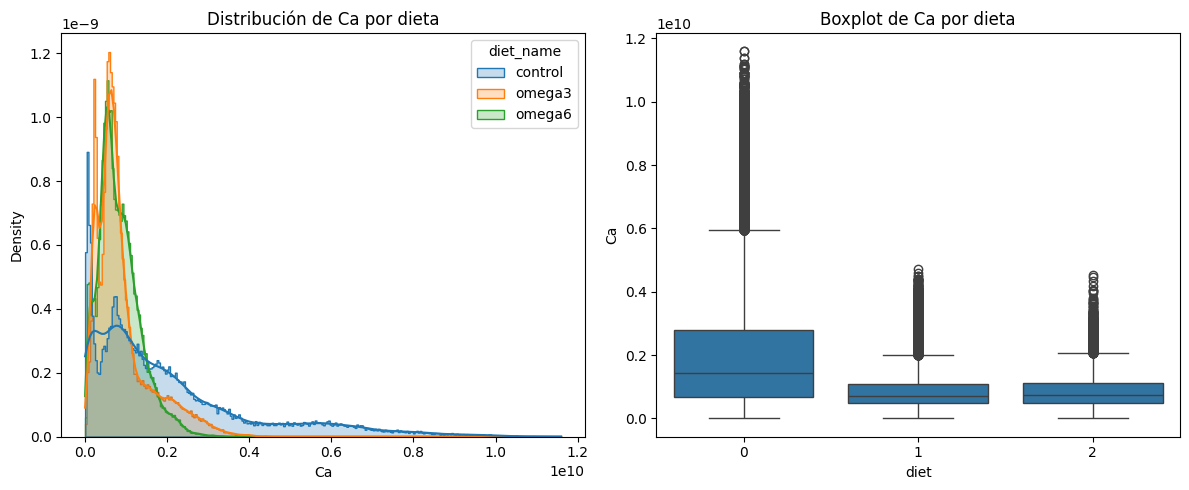

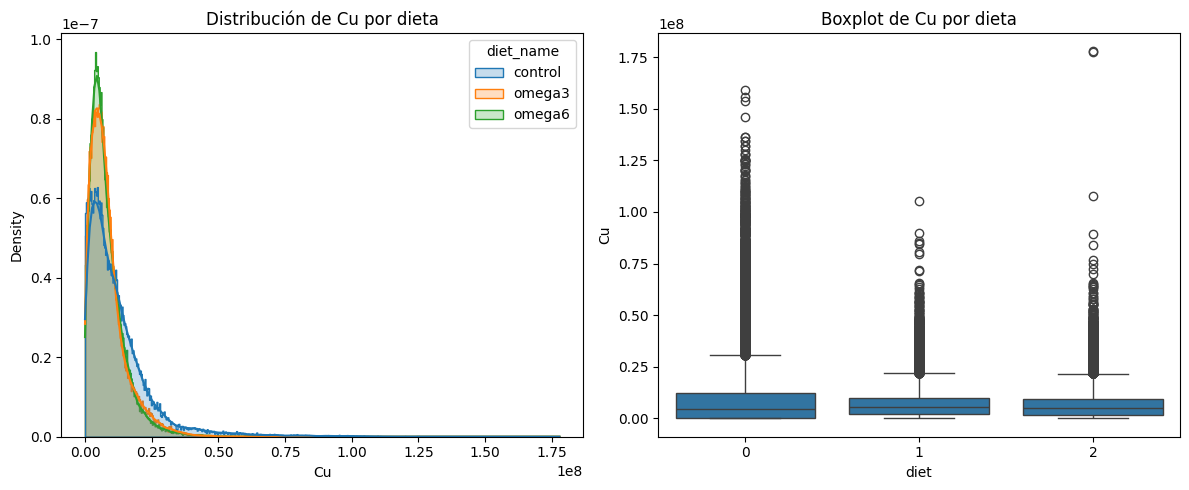

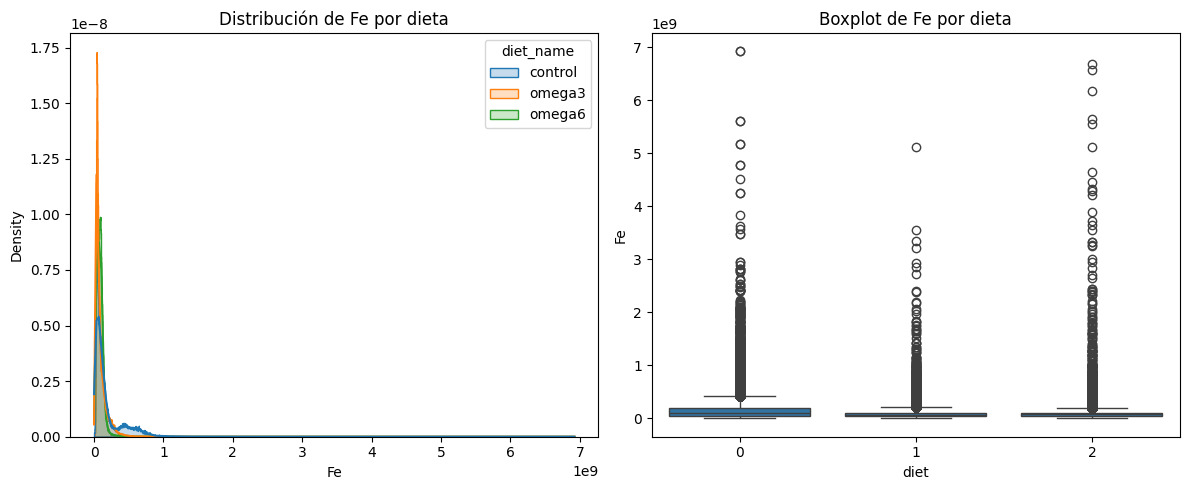

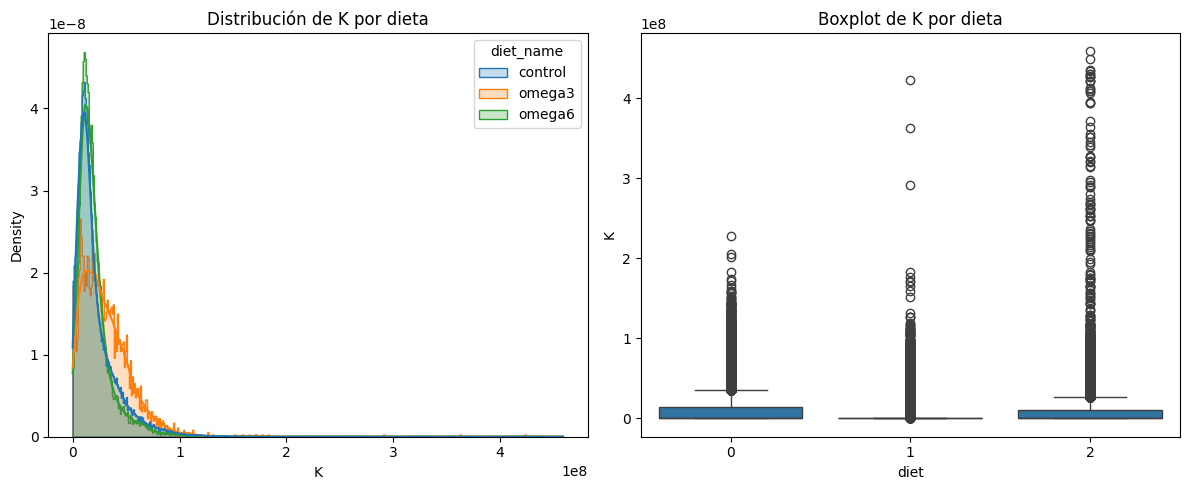

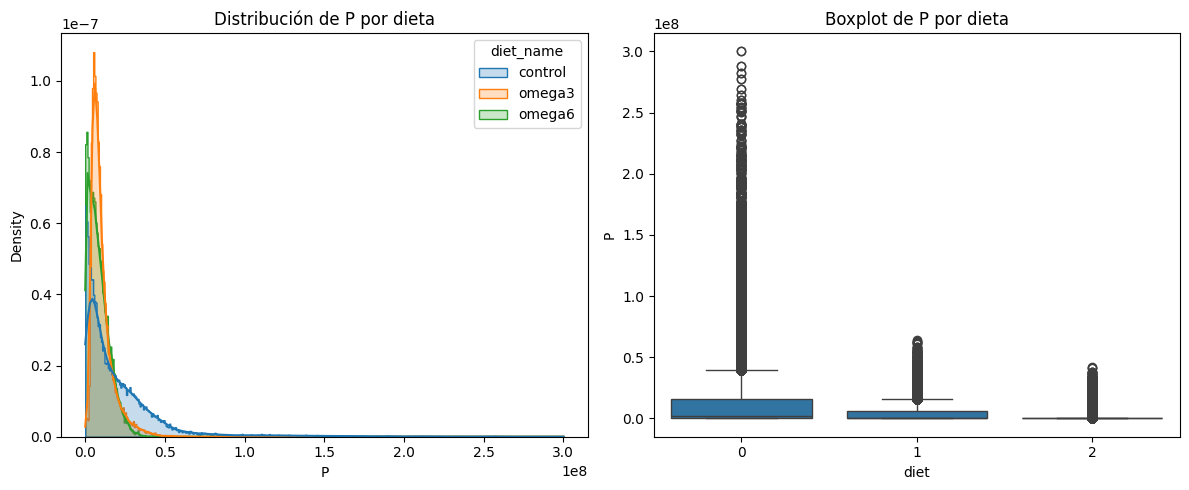

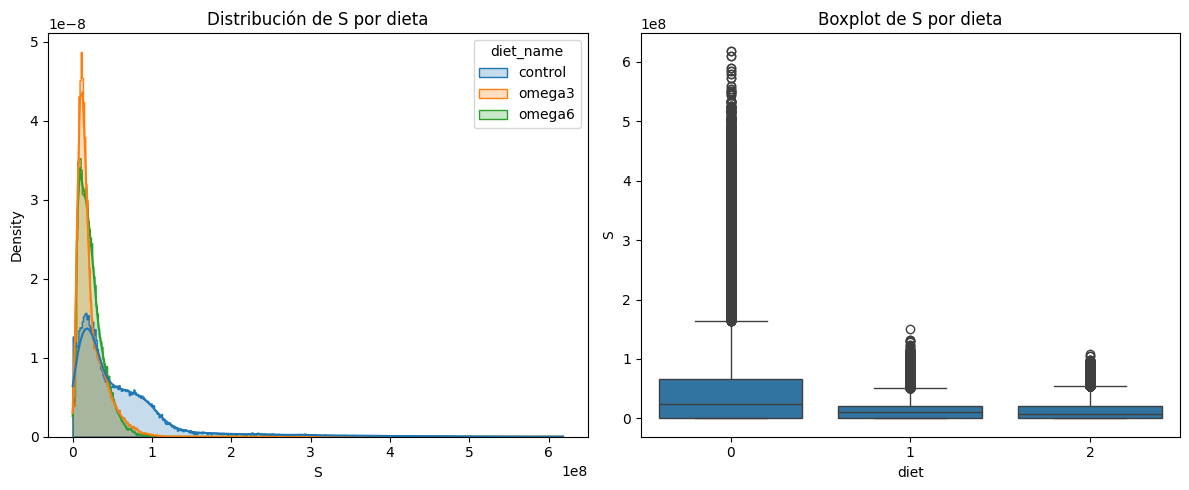

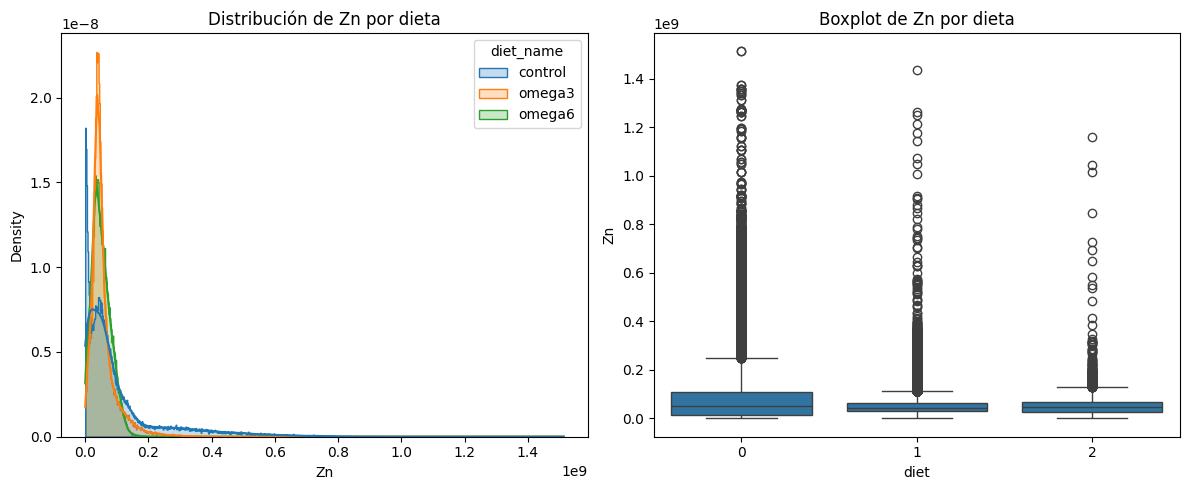

In [44]:
variables=['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']
for var in variables:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df1 = df[df[var]>0]
    sns.histplot(data=df1, x=var, hue='diet_name', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} por dieta')
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='diet', y=var)
    plt.title(f'Boxplot de {var} por dieta')
    plt.tight_layout()
    plt.show()

<Figure size 1800x1800 with 0 Axes>

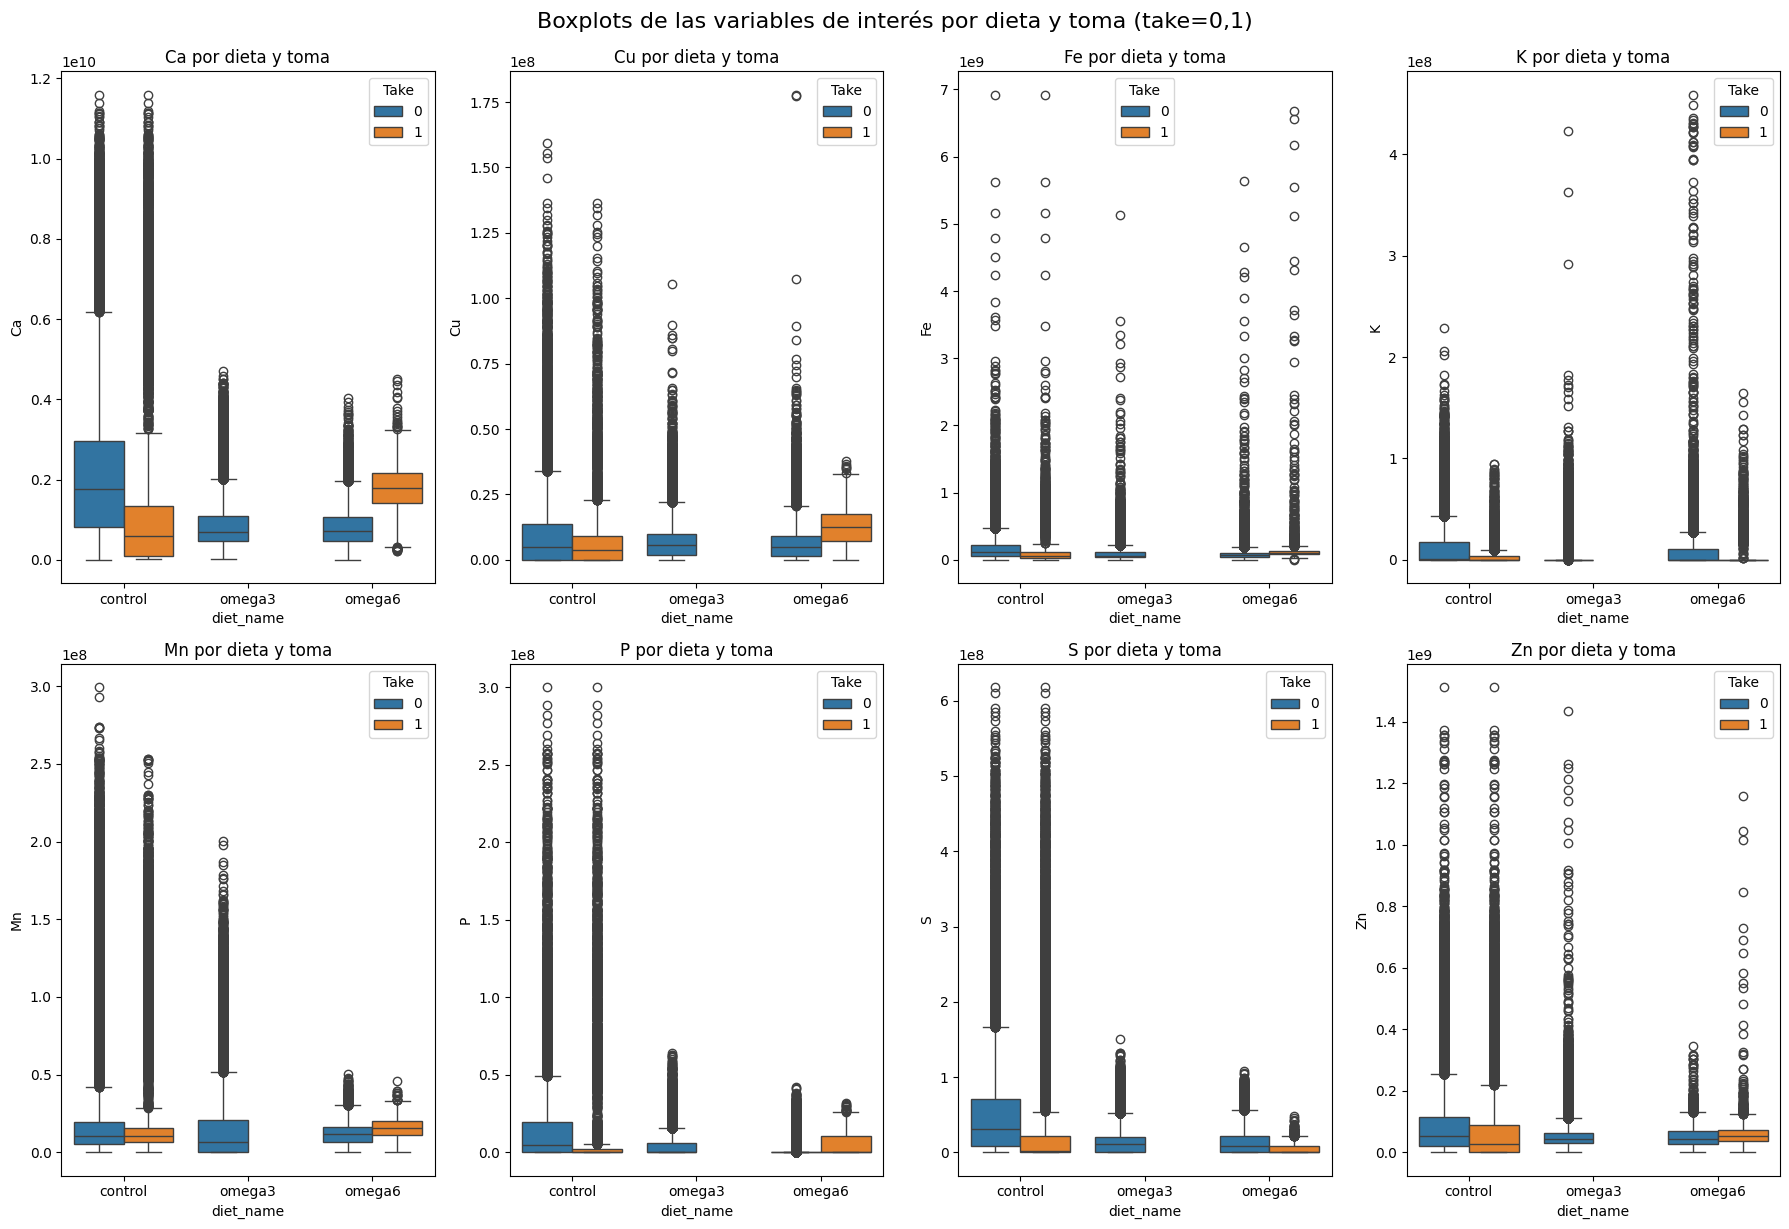

In [ ]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta y toma (take=0,1)
plt.figure(figsize=(18, 18))
fig2, axs2 = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
variables = ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']

for i, var in enumerate(variables):
    row, col = divmod(i, 4)
    sns.boxplot(data=df[df['take'].isin([0, 1])], x='diet_name', y=var, hue='take', ax=axs2[row][col])
    axs2[row][col].set_title(f'{var} por dieta y toma')
    axs2[row][col].legend(title='Take', loc='best')

plt.tight_layout()
plt.suptitle('Boxplots de las variables de interés por dieta y toma (take=0,1)', fontsize=16, y=1.02)
plt.show()

In [ ]:
labels_interesting=['tumoral A','tumoral B','tumoral C','artifacts','blood','loose connective tissue','dense connective tissue']

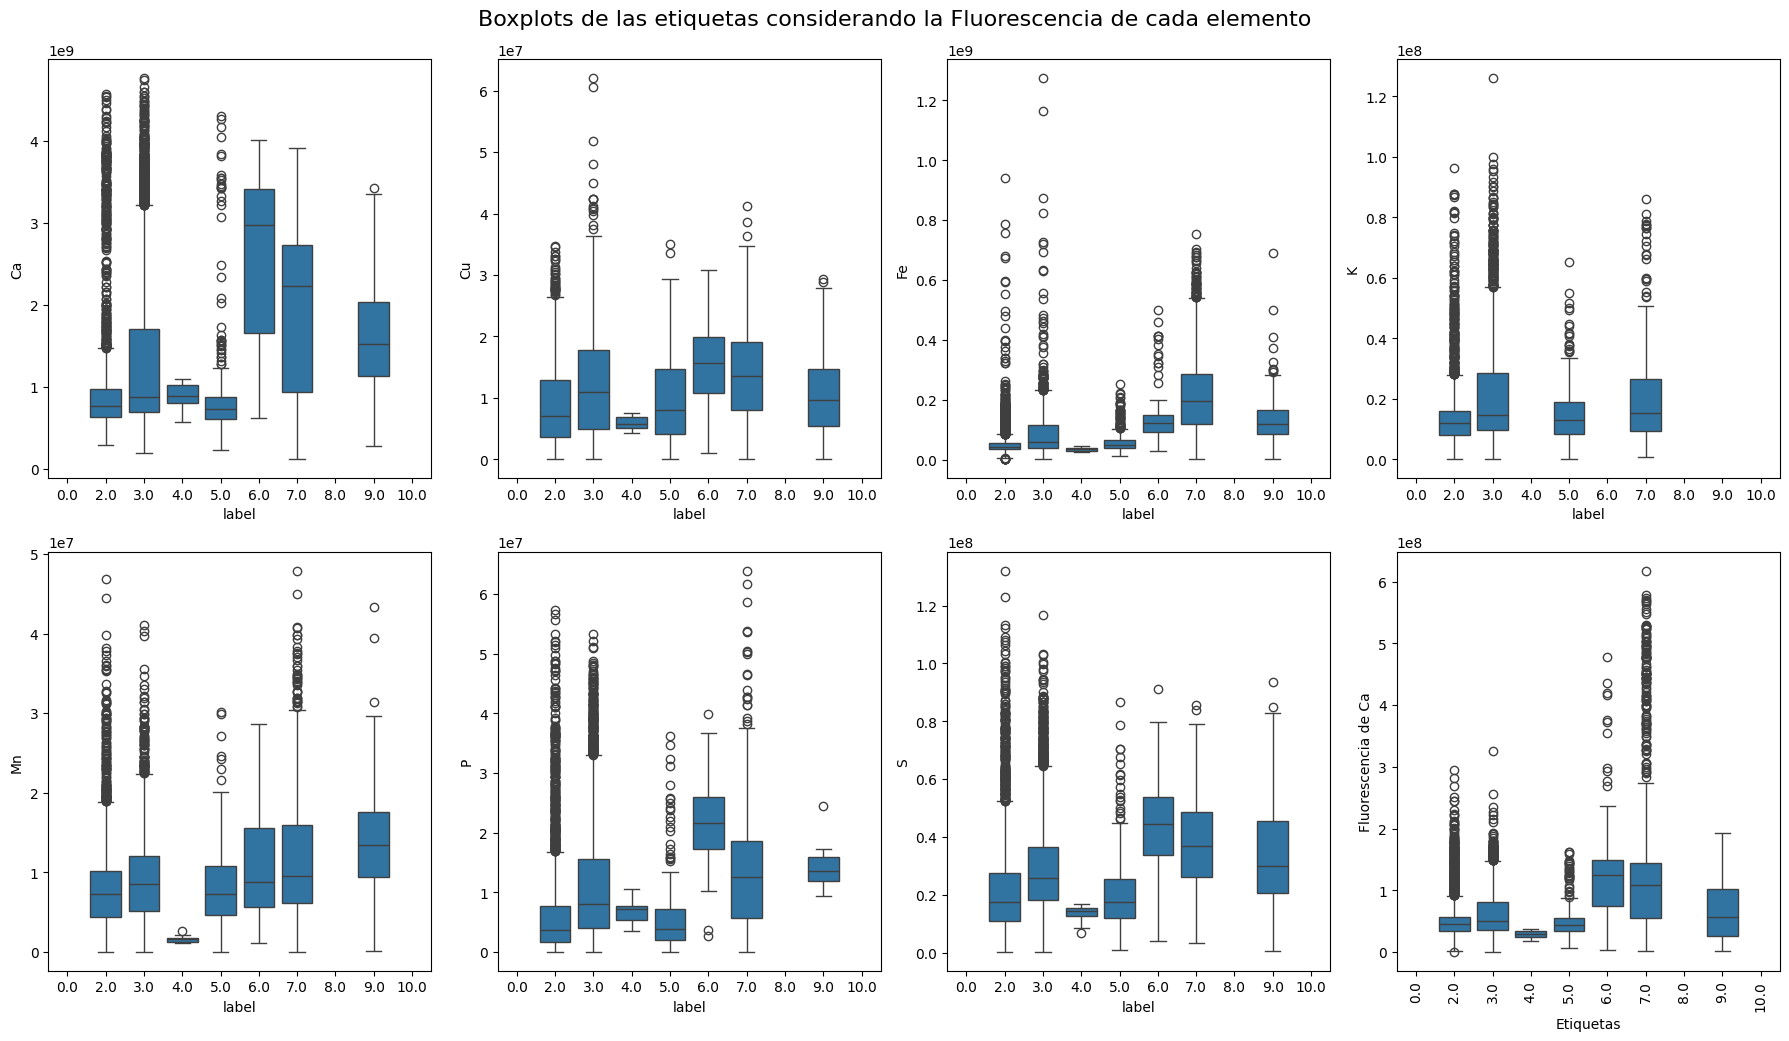

In [111]:
# Boxplots para las etiquetas considerando la Flourescencia de cada elemento
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 10))
sns.boxplot(data=df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)], x='label', y='Ca', ax=axs[0][0])
sns.boxplot(data=df_label_Cu[df_label_Cu['label_name'].isin(labels_interesting)], x='label', y='Cu', ax=axs[0][1])
sns.boxplot(data=df_label_Fe[df_label_Fe['label_name'].isin(labels_interesting)], x='label', y='Fe', ax=axs[0][2])
sns.boxplot(data=df_label_K[df_label_K['label_name'].isin(labels_interesting)], x='label', y='K', ax=axs[0][3])
sns.boxplot(data=df_label_Mn[df_label_Mn['label_name'].isin(labels_interesting)], x='label', y='Mn', ax=axs[1][0])
sns.boxplot(data=df_label_P[df_label_P['label_name'].isin(labels_interesting)], x='label', y='P', ax=axs[1][1])
sns.boxplot(data=df_label_S[df_label_S['label_name'].isin(labels_interesting)], x='label', y='S', ax=axs[1][2])
sns.boxplot(data=df_label_Zn[df_label_Zn['label_name'].isin(labels_interesting)], x='label', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las etiquetas considerando la Fluorescencia de cada elemento', fontsize=16, y=1.02)
plt.xticks(rotation=90)
plt.xlabel('Etiquetas')
plt.ylabel('Fluorescencia de Ca')
plt.show()

# Boxplots para las etiquetas considerando la Flourescencia de Ca
## Se filtran las etiquetas de interés y se crea un boxplot para la variable 'Ca'

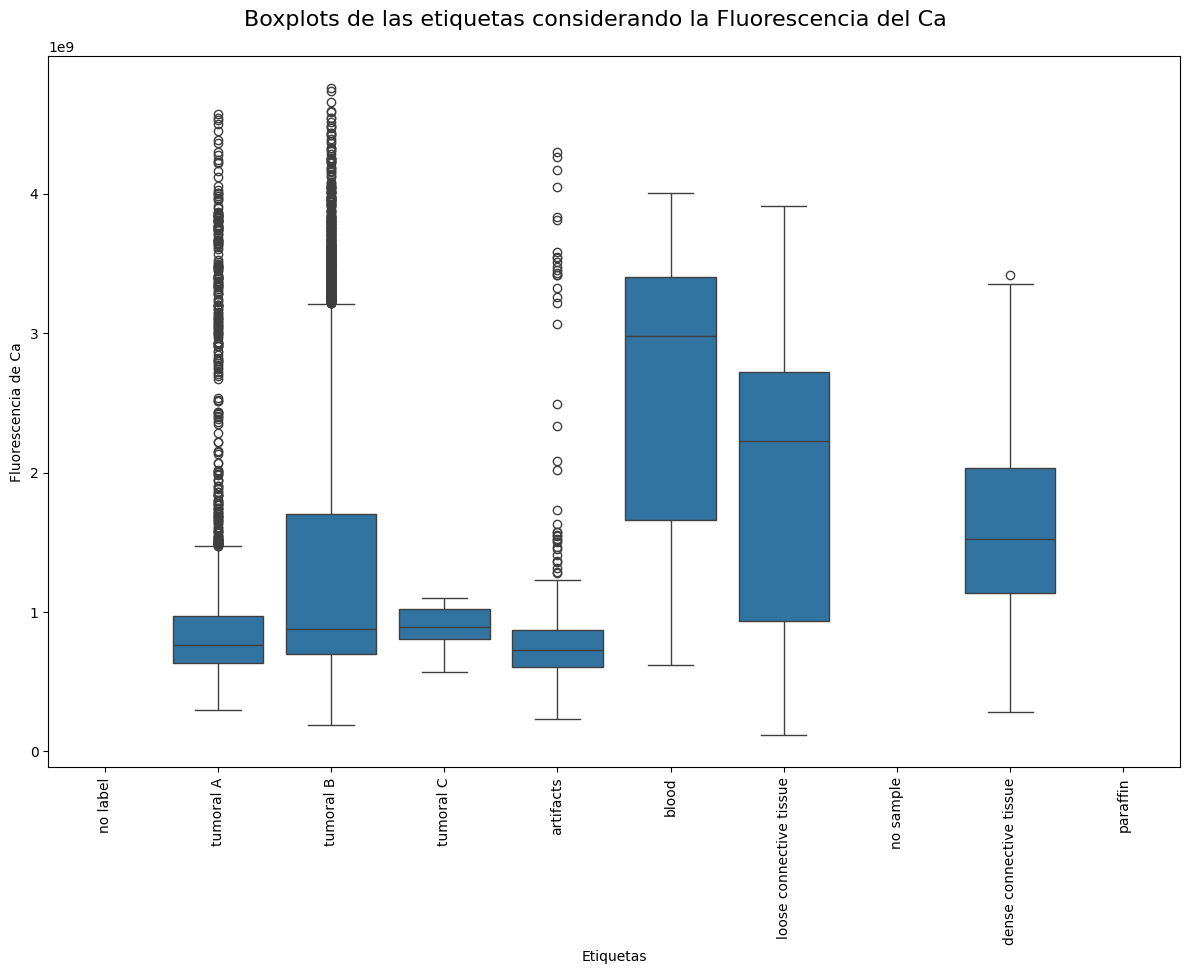

In [ ]:
# Boxplots para las etiquetas considerando la Flourescencia de Ca
# Se filtran las etiquetas de interés y se crea un boxplot para la variable 'Ca'
#fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 15))
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_label_Ca[df_label_Ca['label_name'].isin(labels_interesting)], x='label_name', y='Ca')
#sns.boxplot(data=df_label_Cu[df_label_Cu['label'].isin(labels_interesting)], x='label', y='Cu', ax=axs[0][1])
#sns.boxplot(data=df_label_Fe[df_label_Fe['label'].isin(labels_interesting)], x='label', y='Fe', ax=axs[0][2])
#sns.boxplot(data=df_label_K[df_label_K['label'].isin(labels_interesting)], x='label', y='K', ax=axs[0][3])
#sns.boxplot(data=df_label_Mn[df_label_Mn['label'].isin(labels_interesting)], x='label', y='Mn', ax=axs[1][0])
#sns.boxplot(data=df_label_P[df_label_P['label'].isin(labels_interesting)], x='label', y='P', ax=axs[1][1])
#sns.boxplot(data=df_label_S[df_label_S['label'].isin(labels_interesting)], x='label', y='S', ax=axs[1][2])
#sns.boxplot(data=df_label_Zn[df_label_Zn['label'].isin(labels_interesting)], x='label', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las etiquetas considerando la Fluorescencia del Ca', fontsize=16, y=1.02)
plt.xticks(rotation=90)
plt.xlabel('Etiquetas')
plt.ylabel('Fluorescencia de Ca')
plt.show()

# Prueba de hipótesis para comparar las medias de los grupos de etiquetas para Ca


In [ ]:
alpha = 0.05
grupos = [df_label_Ca[df_label_Ca['label_name'] == d]['Ca'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

tumoral A vs. tumoral B: statistic=-23.572, p-value=5.024e-118 -> Rechaza H0, las medias no son iguales
tumoral A vs. blood: statistic=-16.138, p-value=1.055e-29 -> Rechaza H0, las medias no son iguales
tumoral A vs. loose connective tissue: statistic=-30.218, p-value=7.216e-141 -> Rechaza H0, las medias no son iguales
tumoral A vs. dense connective tissue: statistic=-23.581, p-value=1.677e-91 -> Rechaza H0, las medias no son iguales
tumoral B vs. tumoral C: statistic=14.587, p-value=1.710e-18 -> Rechaza H0, las medias no son iguales
tumoral B vs. artifacts: statistic=11.541, p-value=1.314e-27 -> Rechaza H0, las medias no son iguales
tumoral B vs. blood: statistic=-11.654, p-value=1.367e-20 -> Rechaza H0, las medias no son iguales
tumoral B vs. loose connective tissue: statistic=-16.334, p-value=2.361e-54 -> Rechaza H0, las medias no son iguales
tumoral B vs. dense connective tissue: statistic=-7.421, p-value=2.443e-13 -> Rechaza H0, las medias no son iguales
tumoral C vs. blood: stati

<Axes: xlabel='label_name'>

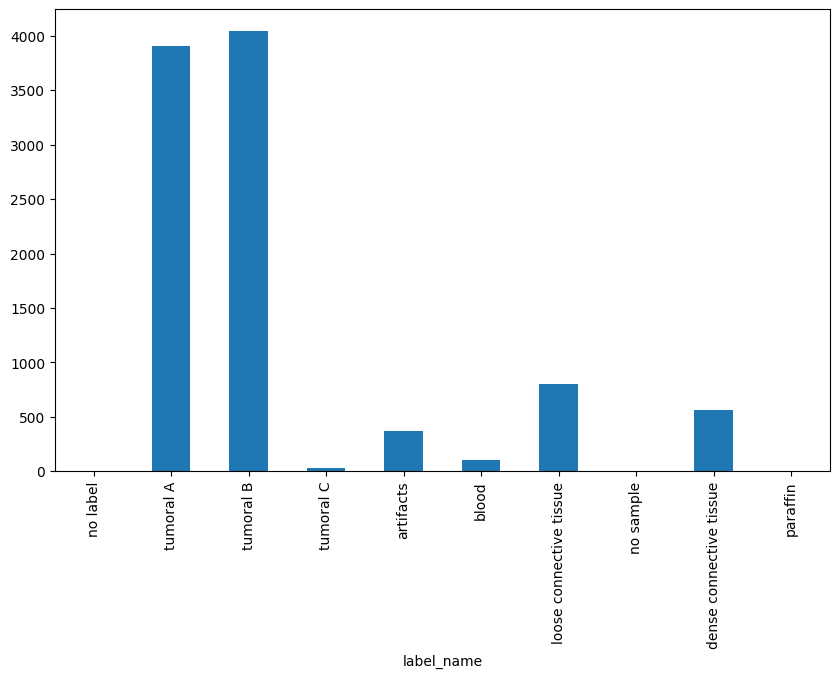

In [ ]:
# Boxplots para las etiquetas considerando la Flourescencia de Cu
# Se filtran las etiquetas de interés y se crea un boxplot para la variable 'Cu'
#fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 15))
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_label_Cu[df_label_Cu['label_name'].isin(labels_interesting)], x='label_name', y='Cu')
#sns.boxplot(data=df_label_Cu[df_label_Cu['label'].isin(labels_interesting)], x='label', y='Cu', ax=axs[0][1])
#sns.boxplot(data=df_label_Fe[df_label_Fe['label'].isin(labels_interesting)], x='label', y='Fe', ax=axs[0][2])
#sns.boxplot(data=df_label_K[df_label_K['label'].isin(labels_interesting)], x='label', y='K', ax=axs[0][3])
#sns.boxplot(data=df_label_Mn[df_label_Mn['label'].isin(labels_interesting)], x='label', y='Mn', ax=axs[1][0])
#sns.boxplot(data=df_label_P[df_label_P['label'].isin(labels_interesting)], x='label', y='P', ax=axs[1][1])
#sns.boxplot(data=df_label_S[df_label_S['label'].isin(labels_interesting)], x='label', y='S', ax=axs[1][2])
#sns.boxplot(data=df_label_Zn[df_label_Zn['label'].isin(labels_interesting)], x='label', y='Zn', ax=axs[1][3])
plt.tight_layout()
plt.suptitle('Boxplots de las etiquetas considerando la Fluorescencia del Cu', fontsize=16, y=1.02)
plt.xticks(rotation=90)
plt.xlabel('Etiquetas')
plt.ylabel('Fluorescencia de Cu')
plt.show()

In [ ]:
# Prueba de hipótesis para comparar las medias de los grupos de etiquetas para Cu
alpha = 0.05
grupos = [df_label_Cu[df_label_Cu['label_name'] == d]['Cu'] for d in labels_interesting]
# Comparar cada par de grupos
for i in range(len(grupos)):
    for j in range(i+1, len(grupos)):
        stat, pval = stats.ttest_ind(grupos[i], grupos[j], equal_var=False)
        resultado = "Rechaza H0, las medias no son iguales" if pval < alpha else "No rechaza H0, las medias son iguales"
        if resultado == "Rechaza H0, las medias no son iguales":
            print(f"{labels_interesting[i]} vs. {labels_interesting[j]}: statistic={stat:.3f}, p-value={pval:.3e} -> {resultado}")
        else:
            pass

In [36]:
df_grouped = df[['label','diet','Ca','Cu','Fe','K','Mn','P','S','Zn']].groupby(['diet', 'label']).mean().reset_index()
df_grouped.dropna(inplace=True)
df_grouped

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_25473/2715755745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df[['label','diet','Ca','Cu','Fe','K','Mn','P','S','Zn']].groupby(['diet', 'label']).mean().reset_index()


diet label            Ca            Cu            Fe             K  \
0     0   0.0  1.652778e+09  1.012637e+07  9.917775e+07  6.134488e+06   
1     0   2.0  9.057152e+08  6.380941e+06  5.043783e+07  1.065482e+07   
2     0   3.0  1.367009e+09  9.376398e+06  8.170487e+07  1.401776e+07   
3     0   4.0  8.904235e+08  5.866324e+06  3.316459e+07  0.000000e+00   
4     0   5.0  8.934122e+08  7.350803e+06  5.828194e+07  1.231090e+07   
5     0   6.0  2.569411e+09  1.396495e+07  1.474238e+08  0.000000e+00   
6     0   7.0  2.166414e+09  1.235333e+07  2.390962e+08  4.487432e+06   
7     0   8.0  6.493736e+08  4.597176e+06  7.413265e+07  5.661903e+04   
8     0   9.0  1.601959e+09  8.637674e+06  1.294304e+08  0.000000e+00   
10    1   0.0  1.346731e+09  1.297930e+07  1.924465e+08  3.246299e+07   
11    1   2.0  1.291147e+09  1.387476e+07  1.469428e+08  3.697280e+07   
12    1   3.0  1.314552e+09  1.403285e+07  1.882351e+08  1.730770e+07   
14    1   5.0  1.379724e+09  1.581651e+07  1.907976e+08  2.292367e+07   
15    1   6.0  2.441230e+09  1.361834e+07  1.794330e+08  0.000000e+00   
16    1   7.0  1.212496e+09  1.224983e+07  1.764589e+08  5.086803e+06   
19    1  10.0  1.076533e+09  1.037432e+07  1.695530e+08  2.752335e+05   

              Mn             P             S            Zn  
0   6.665419e+06  9.376277e+06  2.805938e+07  7.341941e+07  
1   5.976961e+06  4.888040e+06  1.960983e+07  4.794745e+07  
2   7.132672e+06  1.038569e+07  2.881856e+07  6.148935e+07  
3   6.748958e+05  6.712198e+06  1.366240e+07  2.854937e+07  
4   6.437651e+06  4.647193e+06  1.938224e+07  4.806743e+07  
5   6.789188e+06  1.332339e+07  3.503295e+07  1.309950e+08  
6   7.517239e+06  4.824207e+06  3.738835e+07  1.641041e+08  
7   1.337719e+07  2.114739e+06  5.644806e+06  2.174781e+07  
8   1.323197e+07  2.311730e+05  2.329794e+07  6.709734e+07  
10  2.277791e+07  1.454717e+07  5.293195e+07  1.321329e+08  
11  2.316873e+07  1.488670e+07  6.849568e+07  1.163753e+08  
12  2.331301e+07  8.009264e+06  4.386192e+07  1.138573e+08  
14  2.080377e+07  9.108556e+06  4.147533e+07  1.124099e+08  
15  2.230594e+07  2.919658e+07  6.181574e+07  1.383542e+08  
16  2.432565e+07  1.123461e+07  1.580634e+07  5.904557e+07  
19  2.684466e+07  5.325912e+06  1.342676e+07  4.363576e+07

In [27]:
columns_interesting = ['diet','Ca', 'Cu', 'Fe', 'K', 'Mn', 'P', 'S', 'Zn']
label_unique = [0.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]

In [37]:
# Selecciona los label_name de interés, por ejemplo 'tumoral B', 'tumoral C', 'blood'
labels_interes = ['tumoral B', 'tumoral C', 'blood']

# Filtra el DataFrame para esos label_name
df_filtrado = df[df['label_name'].isin(labels_interes)]

# Boxplot para cada variable de interés por label_name
plt.figure(figsize=(18, 8))
for idx, var in enumerate(variables):
    plt.subplot(2, 4, idx+1)
    sns.boxplot(data=df_filtrado, x='label_name', y=var)
    plt.title(var)
plt.tight_layout()
plt.suptitle('Boxplots de elementos por label_name seleccionado', fontsize=16, y=1.03)
plt.show()

NameError: name 'variables' is not defined

<Figure size 1800x800 with 0 Axes>

/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_48479/1830925881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label_name", y="Ca",
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_48479/1830925881.py:5: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="label_name", y="Ca",


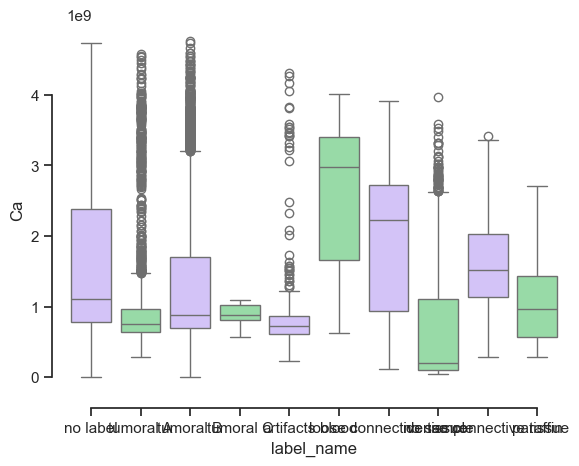

In [111]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="label_name", y="Ca",
            palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)


/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_98399/2560751910.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_98399/2560751910.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/var/folders/9x/sk5wzh9n465bsgp0vntddj3w0000gn/T/ipykernel_98399/2560751910.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


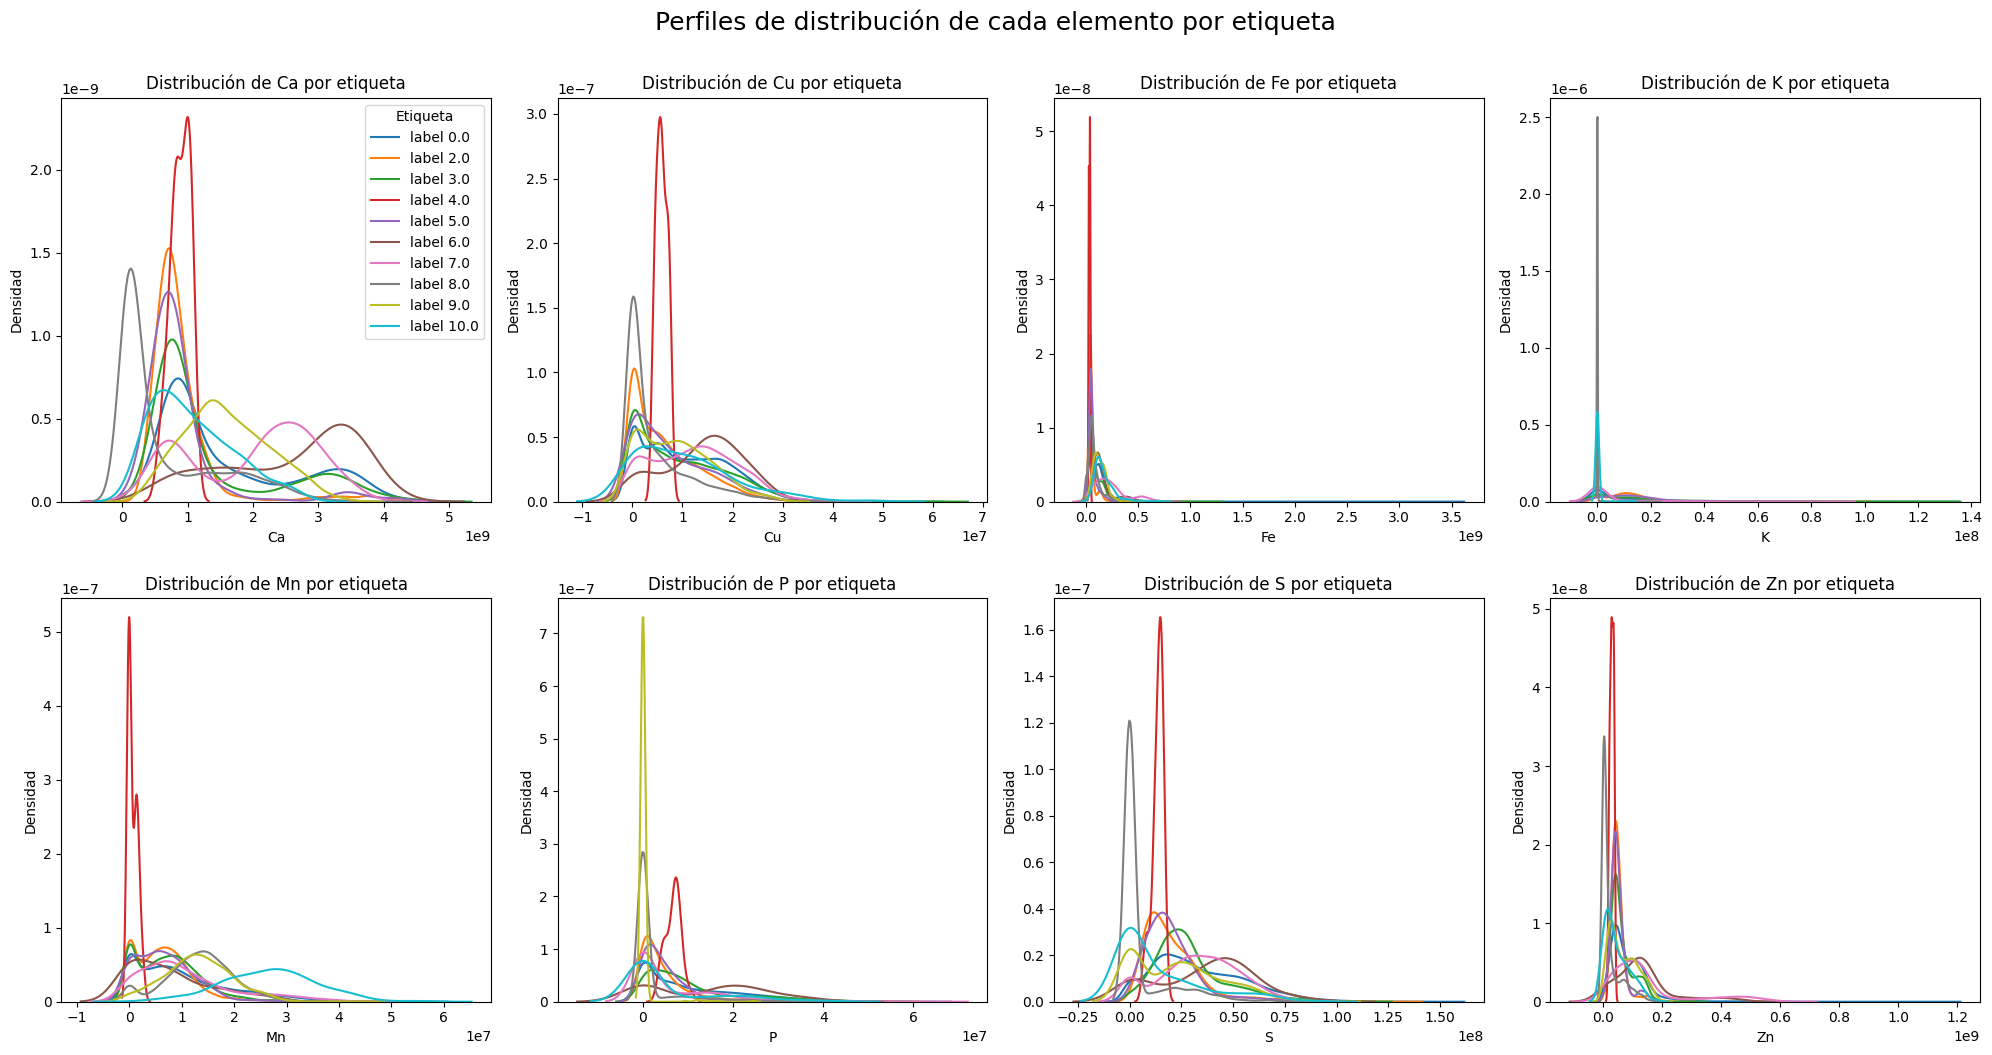

In [28]:
# Generar perfiles de las distribuciones de cada elemento para cada etiqueta en subplots de una sola figura
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for idx, var in enumerate(variables):
    ax = axs[idx]
    for label in label_unique:
        sns.kdeplot(
            data=df[df['label'] == label],
            x=var,
            ax=ax,
            label=f'label {label}',
            fill=False,
            common_norm=False
        )
    ax.set_title(f'Distribución de {var} por etiqueta')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')
    if idx == 0:
        ax.legend(title='Etiqueta')

plt.tight_layout()
plt.suptitle('Perfiles de distribución de cada elemento por etiqueta', fontsize=18, y=1.05)
plt.show()

# Perfil de distribuciones para cada dieta de 'Ca' considerando cada etiqueta individualmente

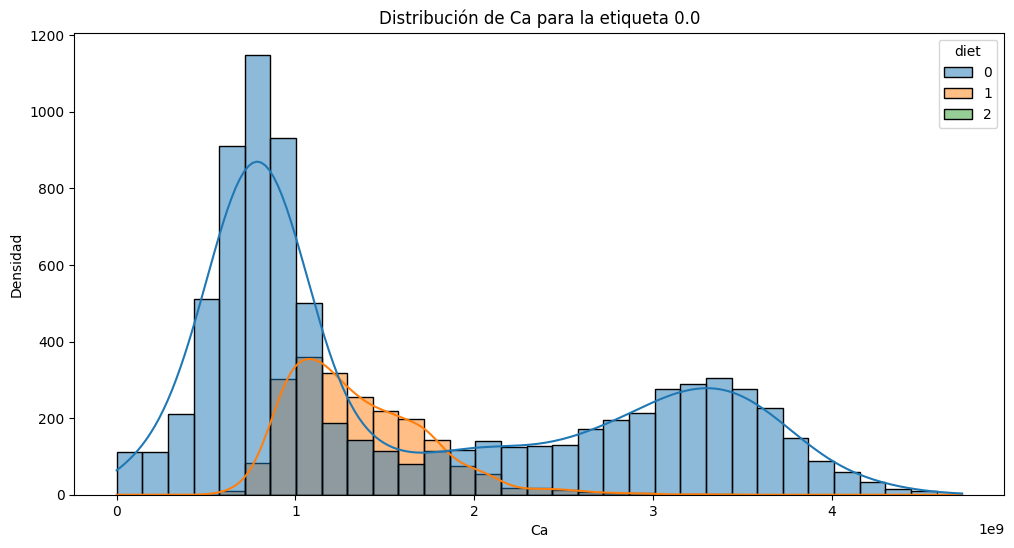

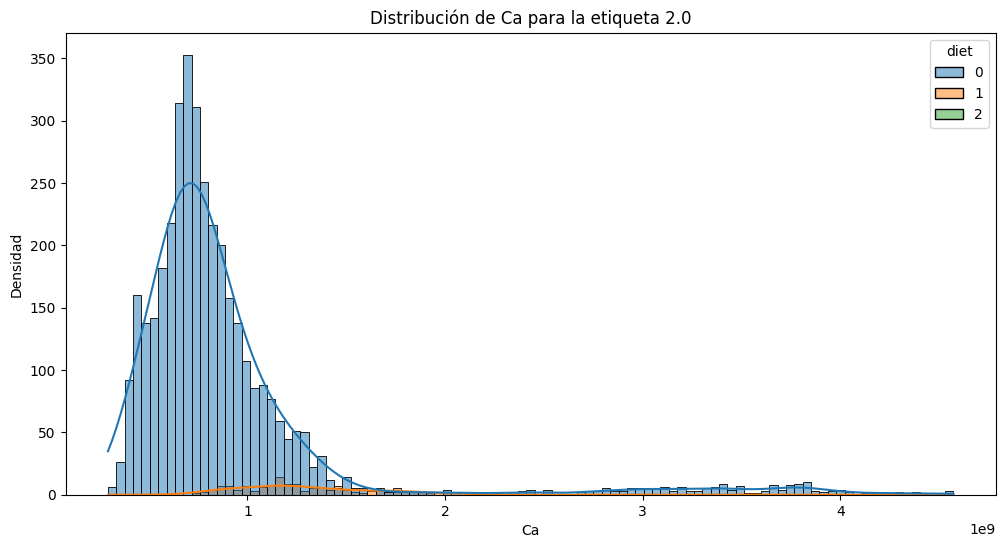

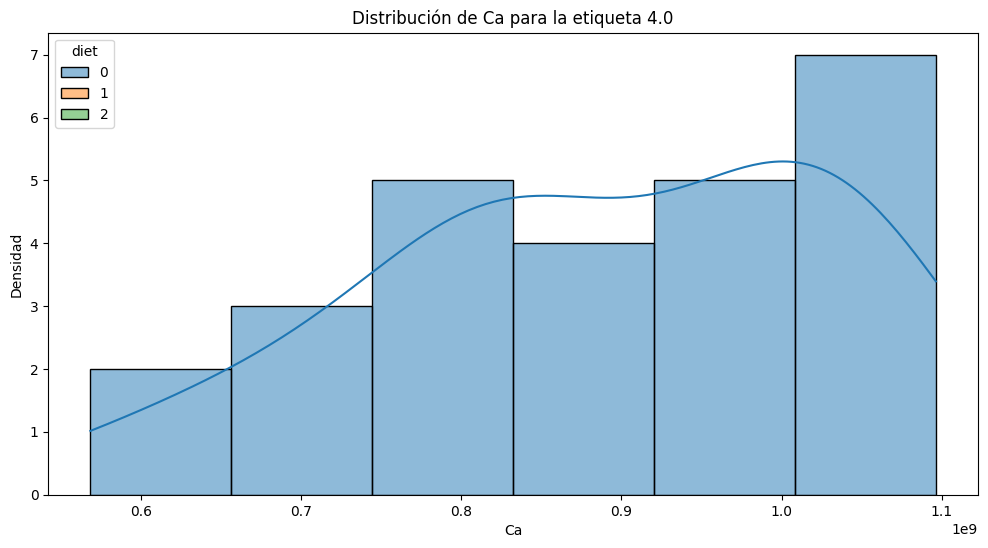

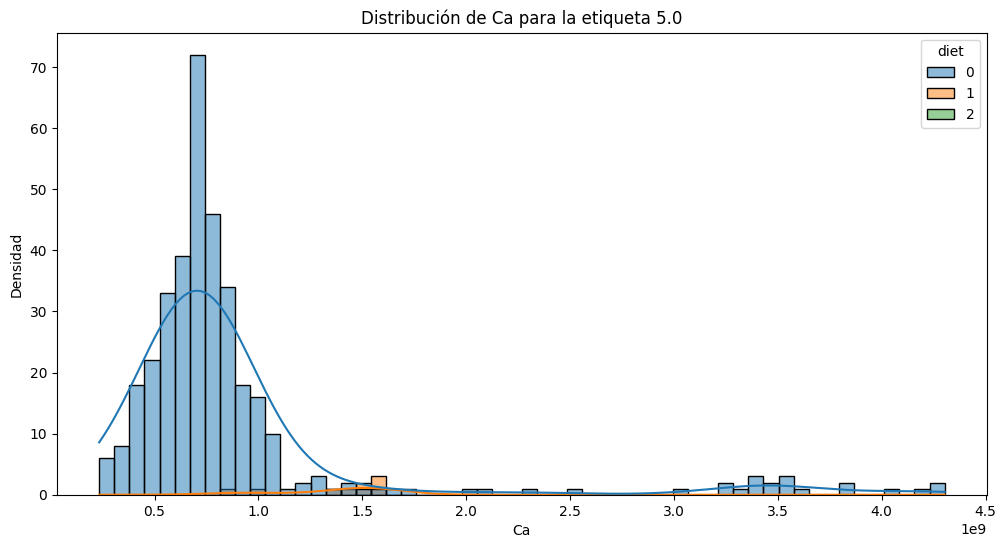

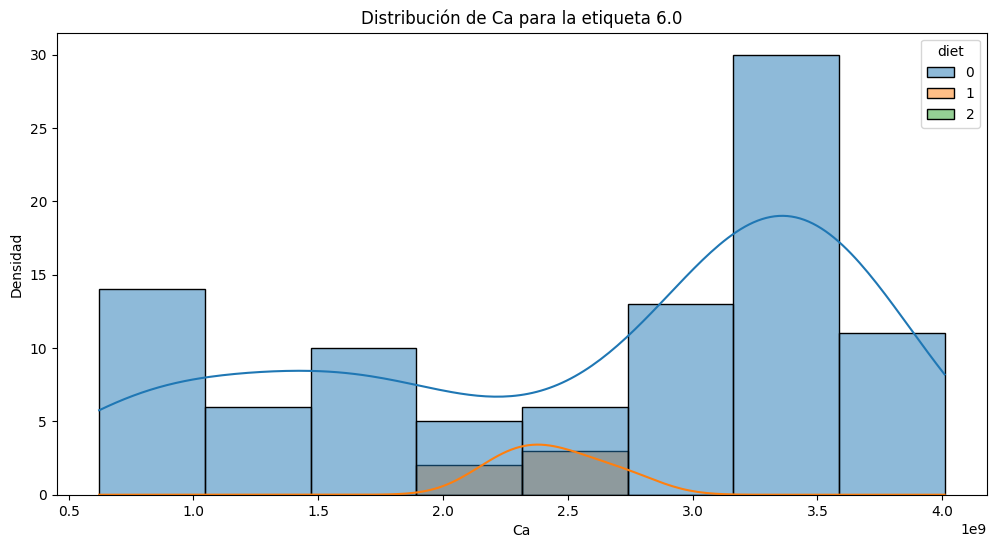

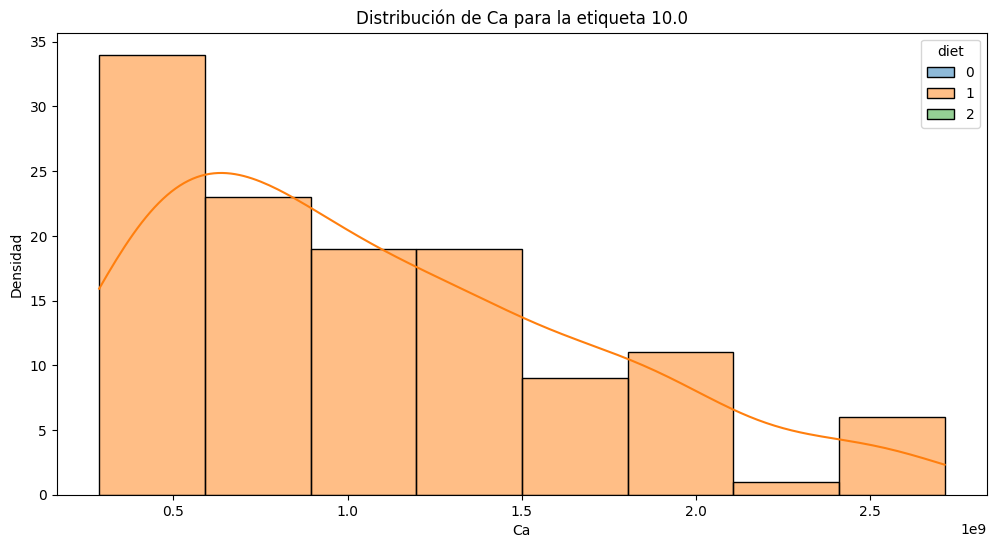

In [29]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='Ca', hue=df['diet'], kde=True)
    plt.title(f'Distribución de Ca para la etiqueta {label}')
    plt.xlabel('Ca')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'Cu' considerando cada etiqueta individualmente

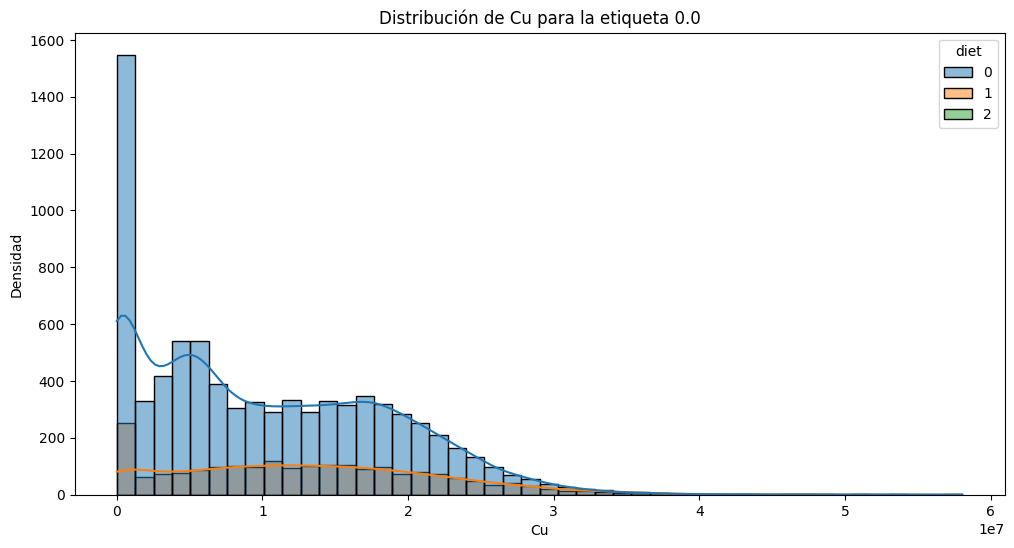

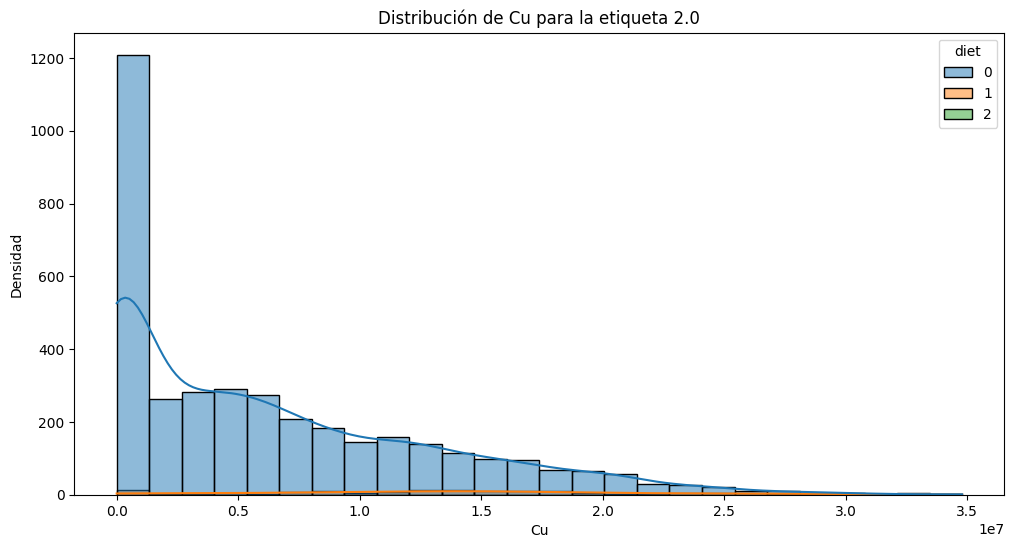

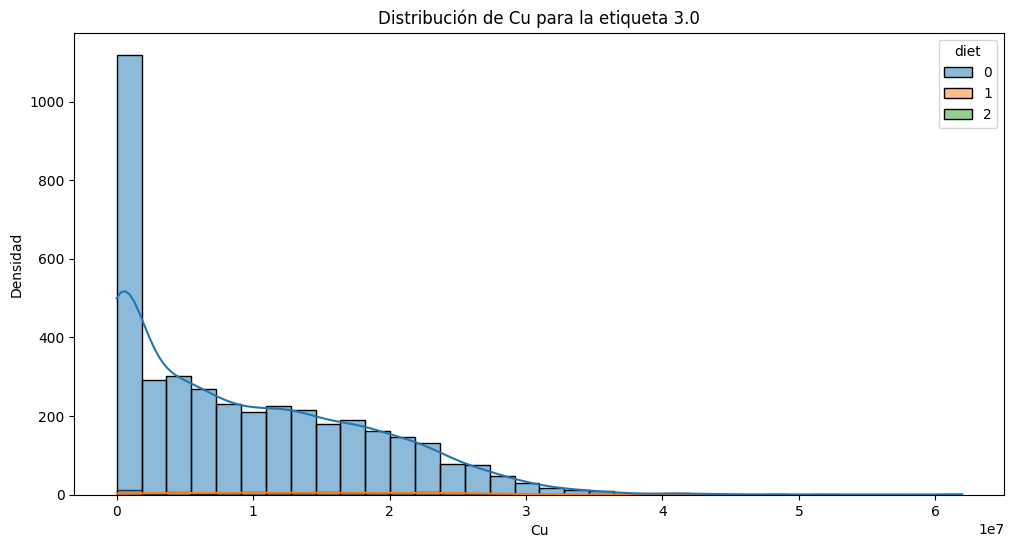

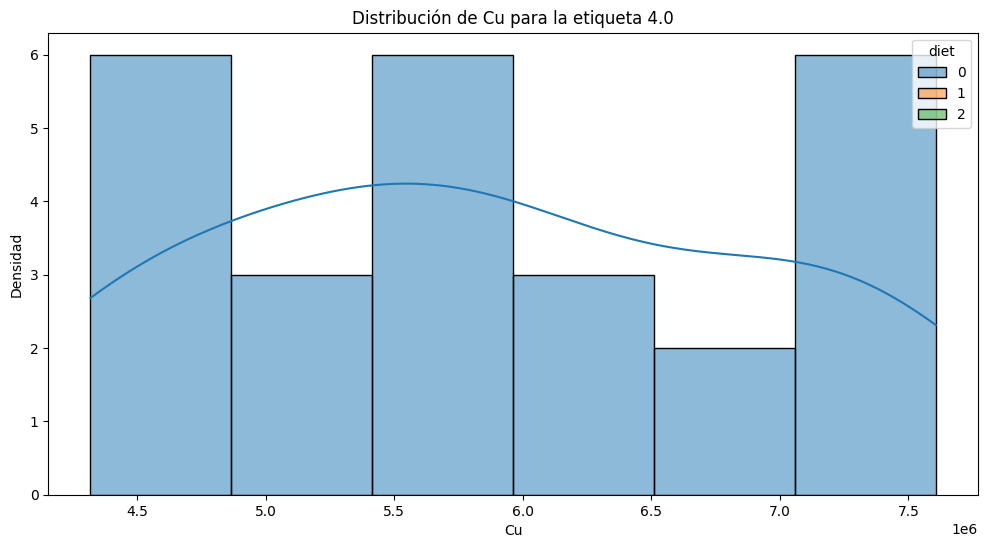

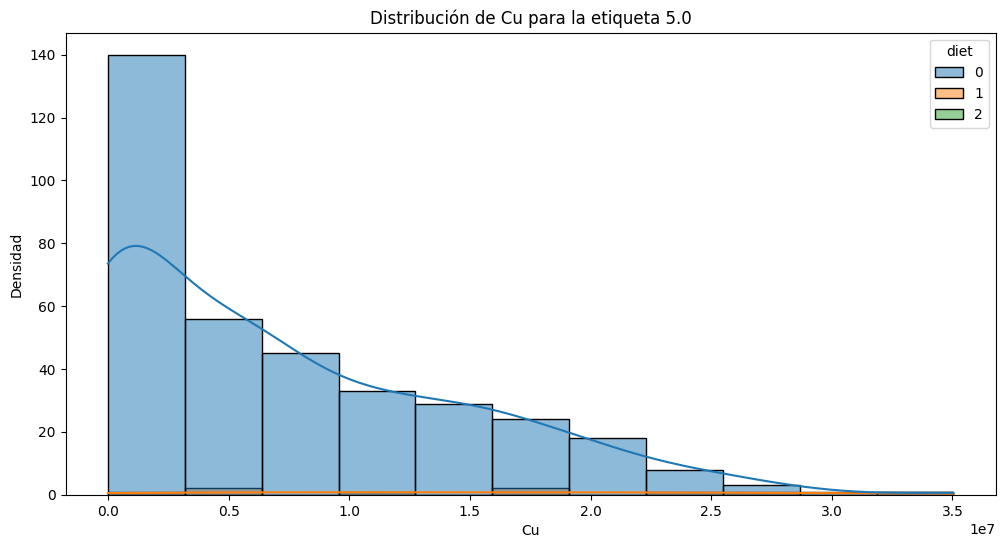

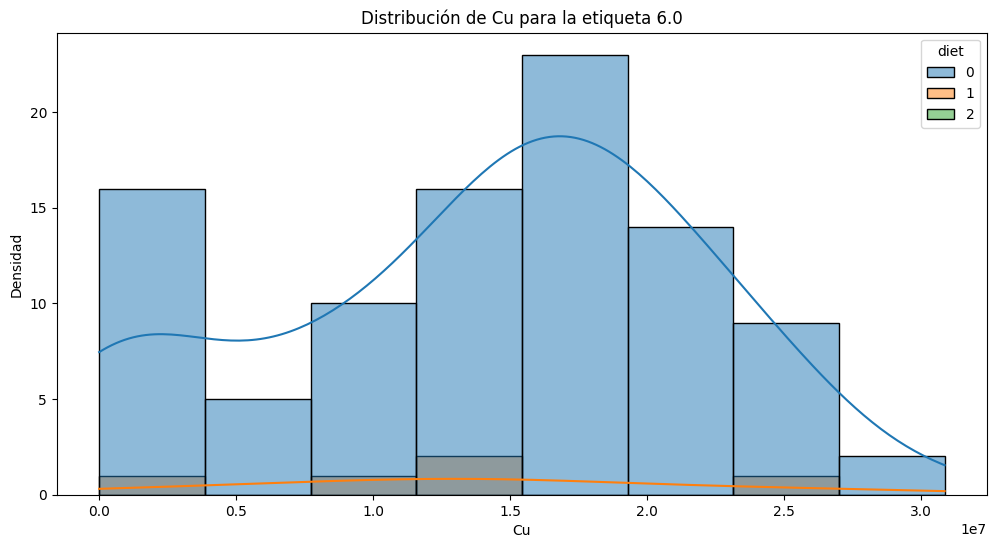

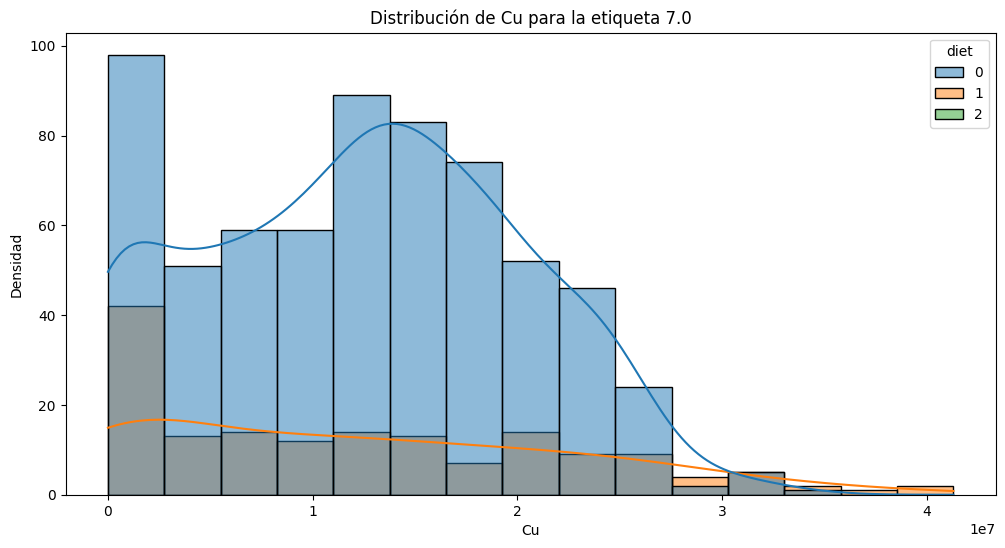

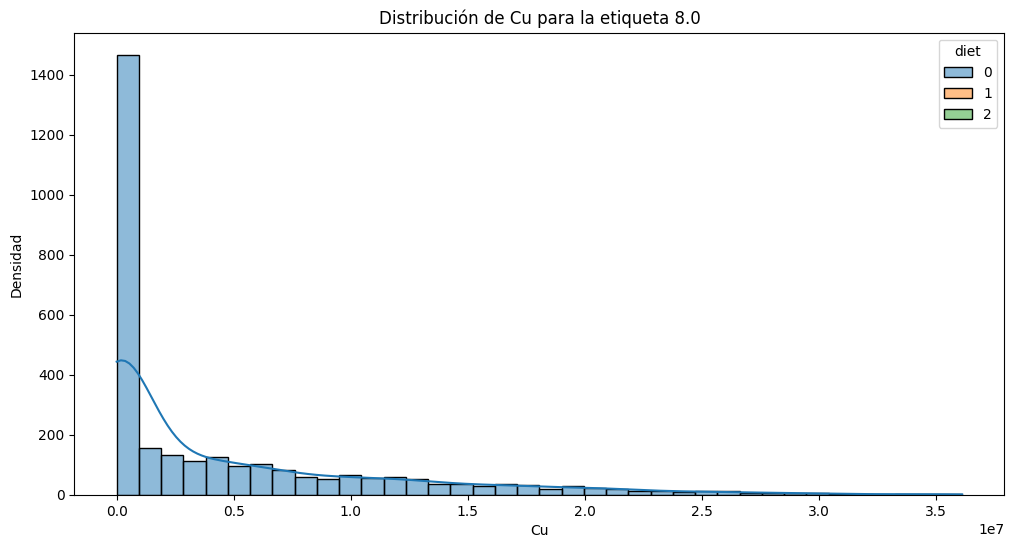

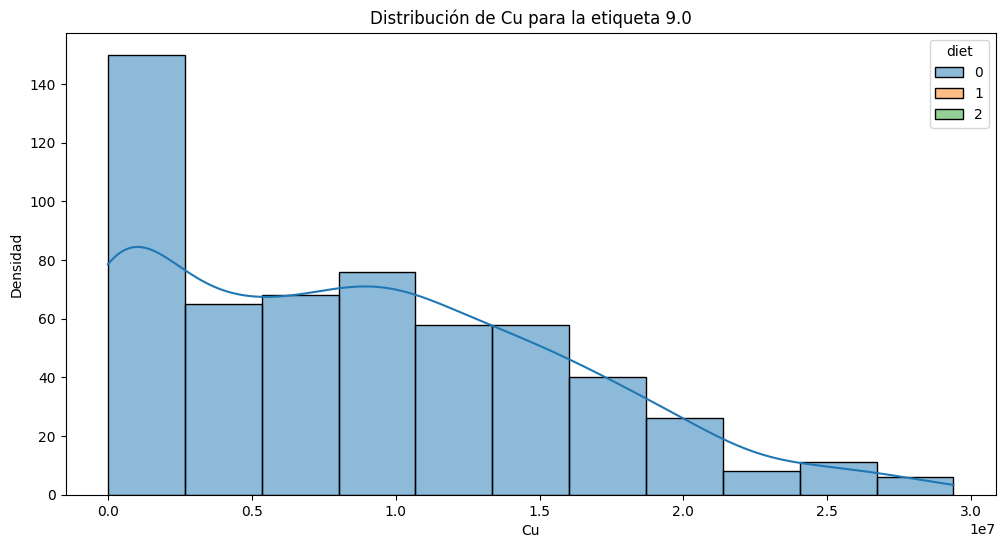

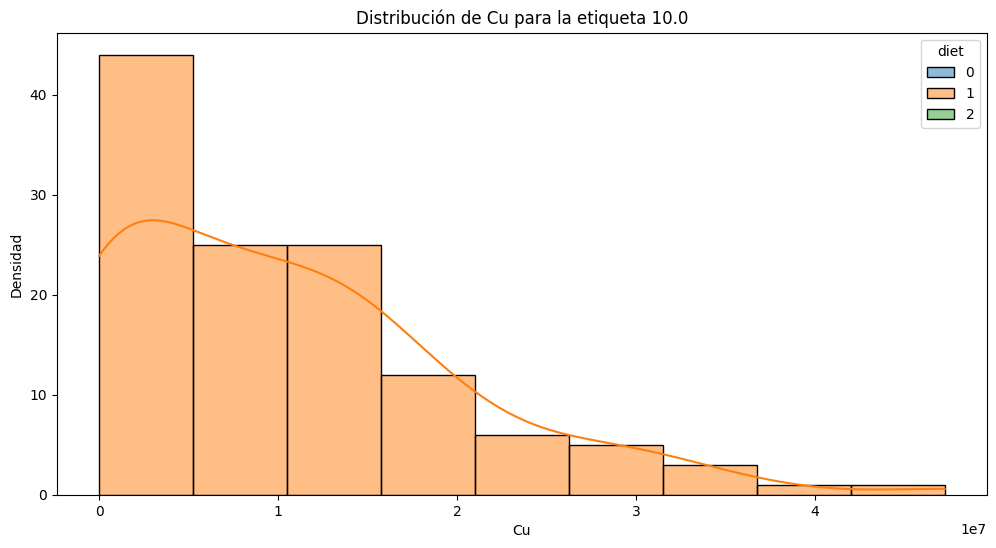

In [30]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='Cu', hue=df['diet'], kde=True)
    plt.title(f'Distribución de Cu para la etiqueta {label}')
    plt.xlabel('Cu')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'Fe' considerando cada etiqueta individualmente

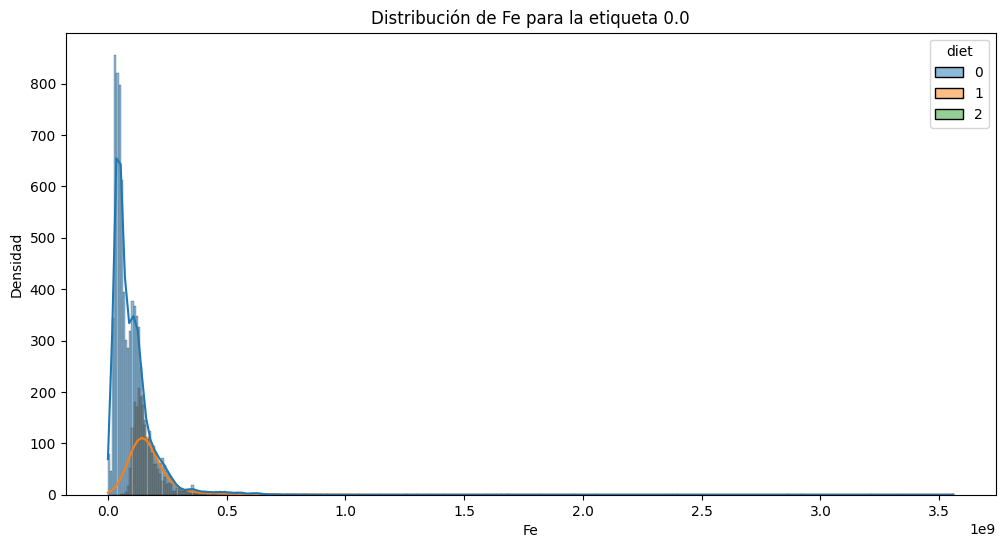

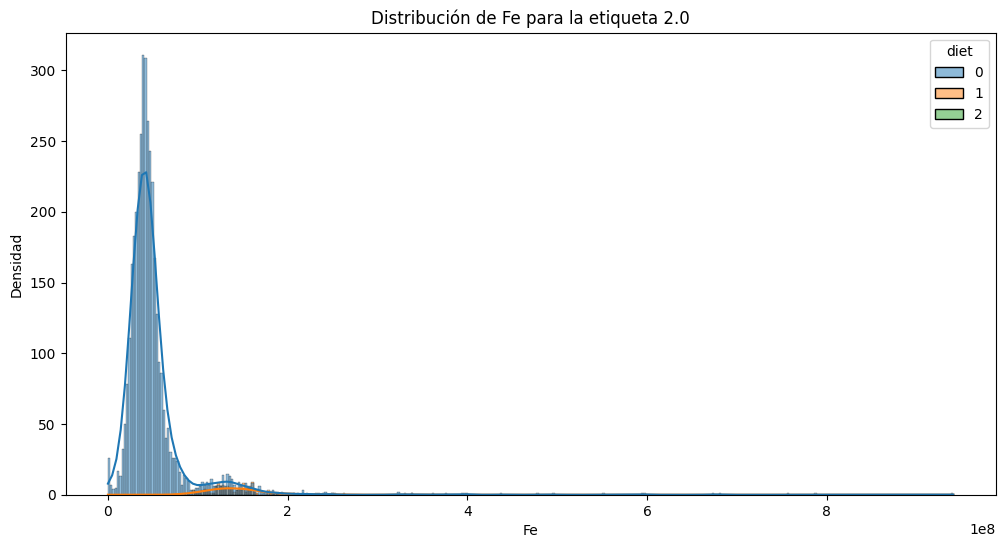

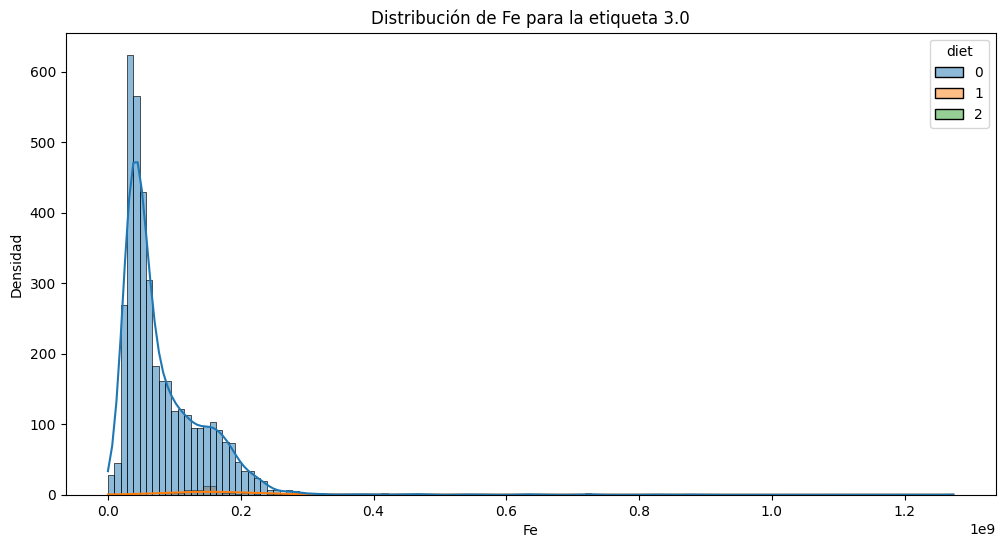

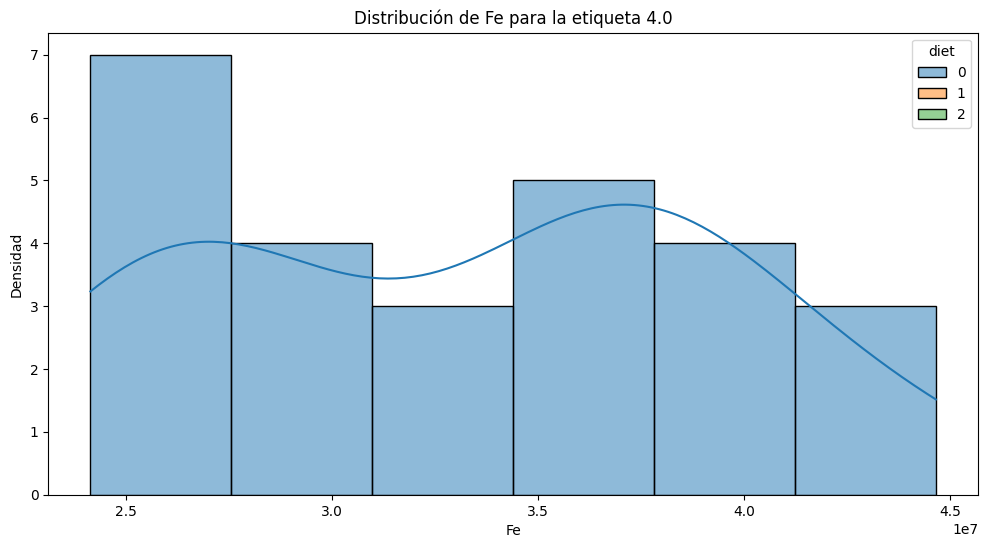

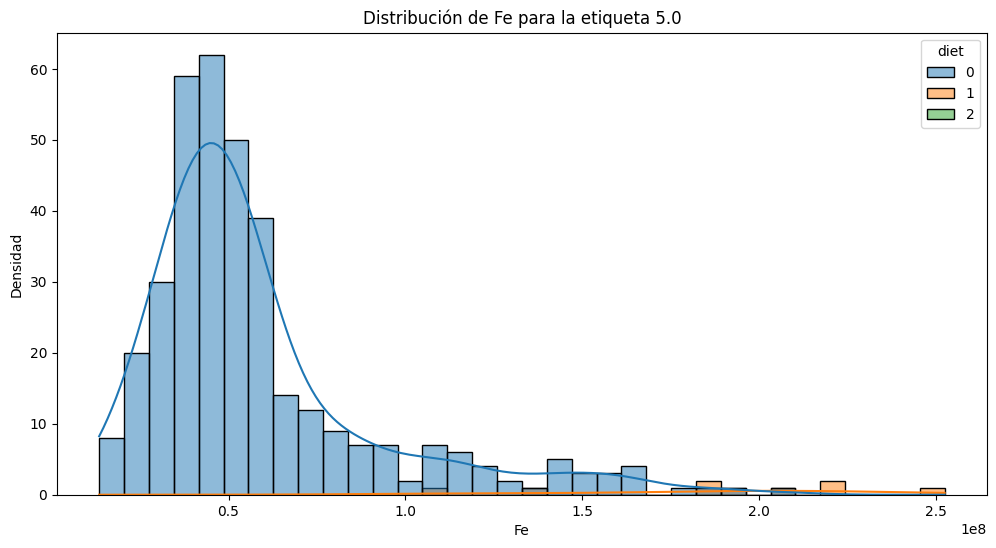

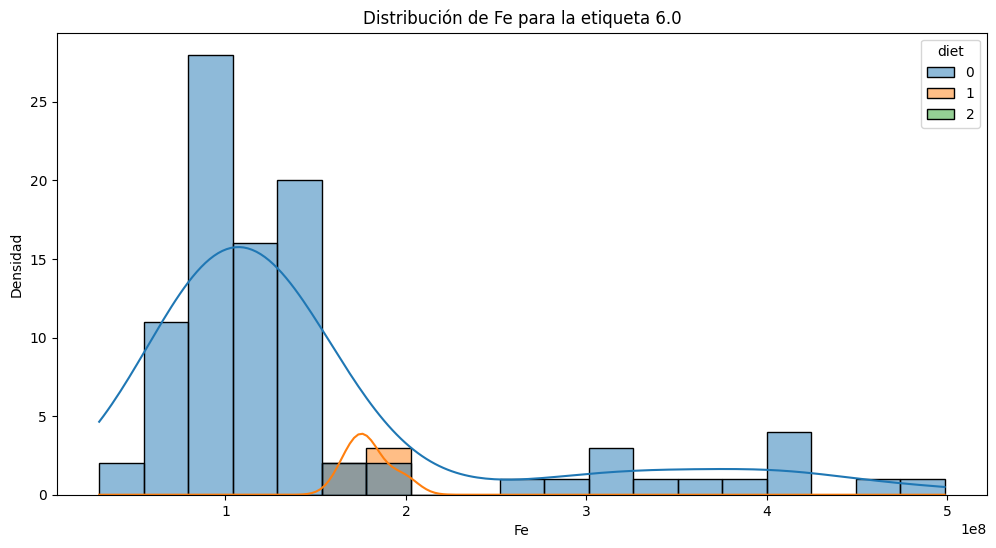

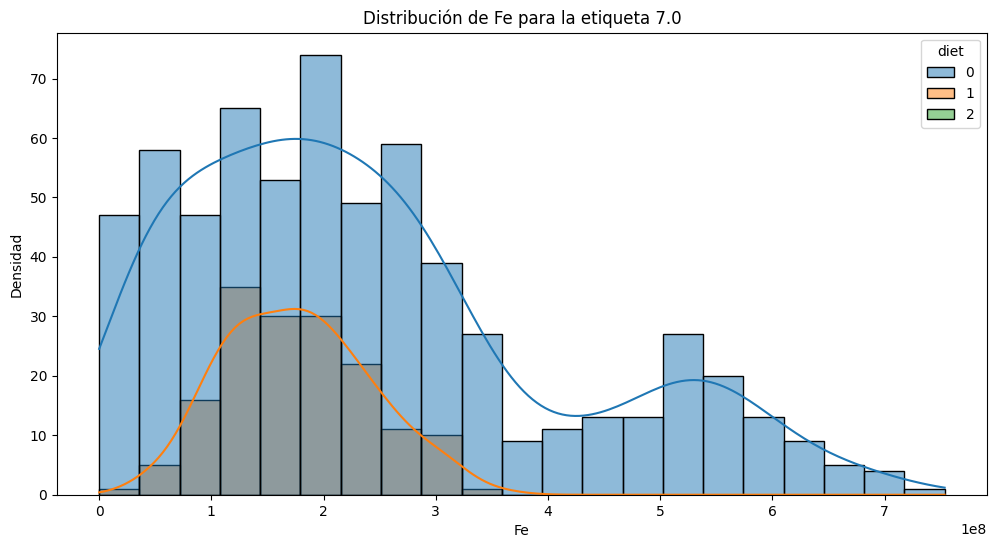

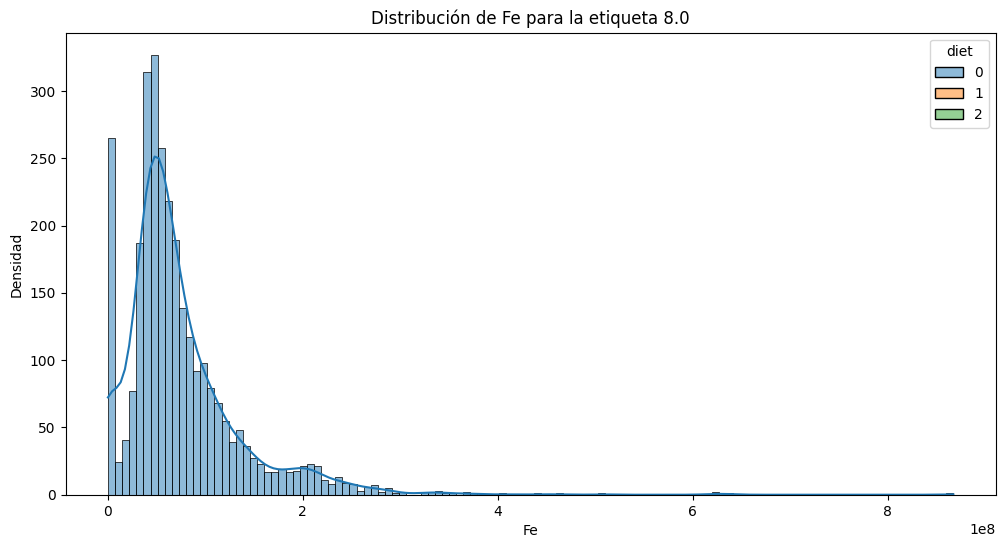

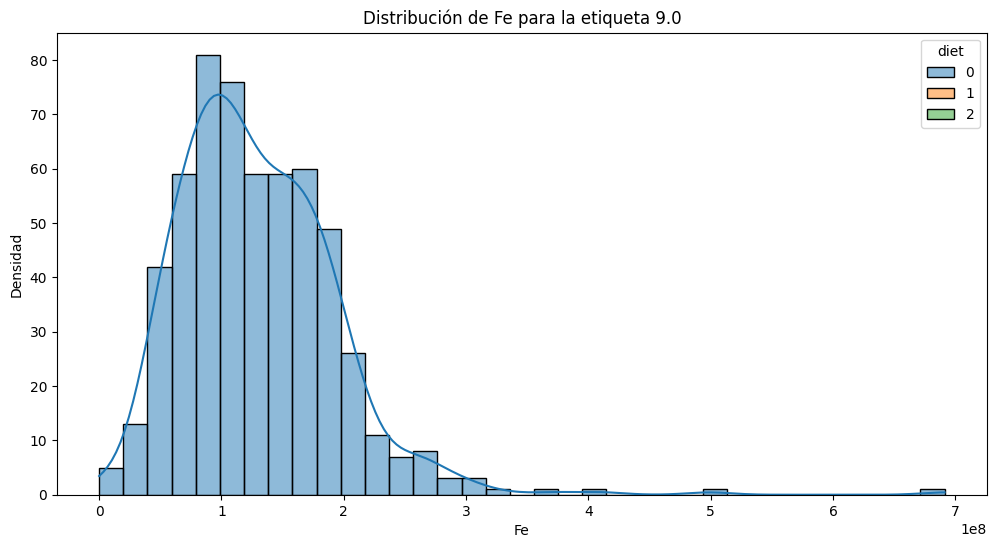

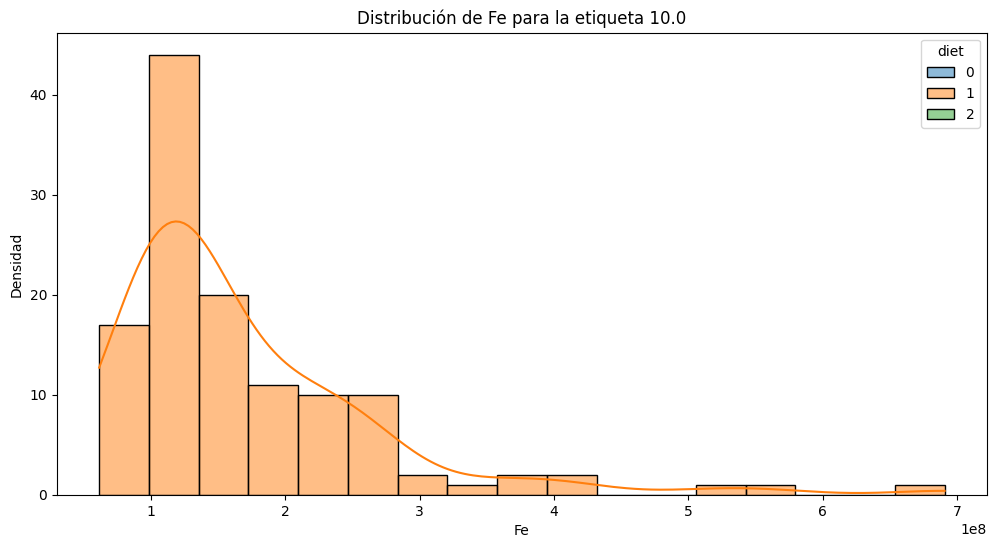

In [31]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='Fe', hue=df['diet'], kde=True)
    plt.title(f'Distribución de Fe para la etiqueta {label}')
    plt.xlabel('Fe')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'K' considerando cada etiqueta individualmente

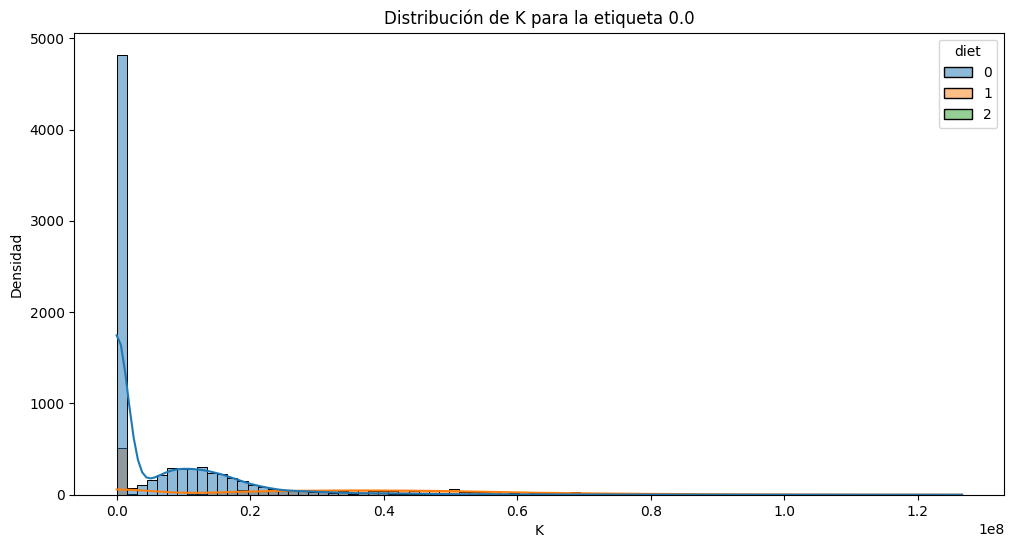

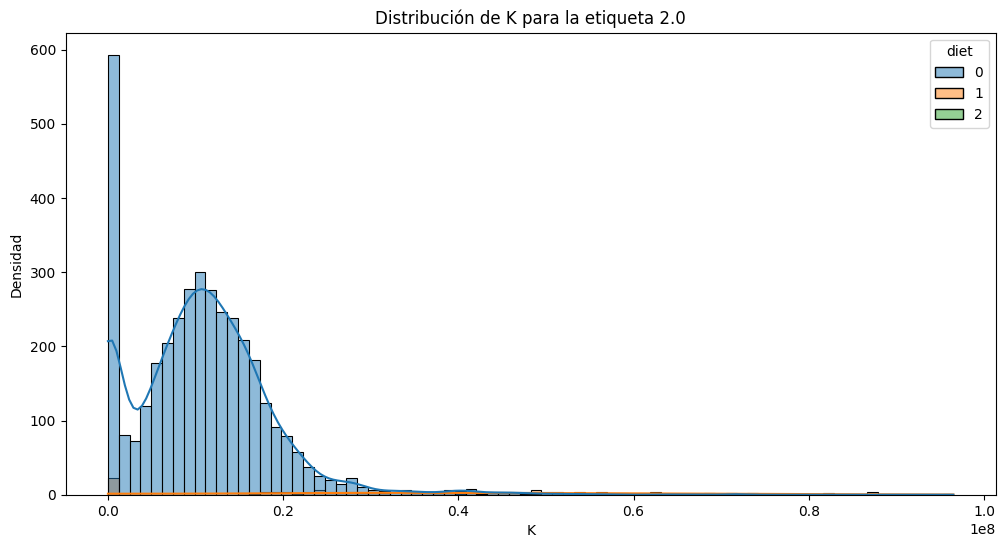

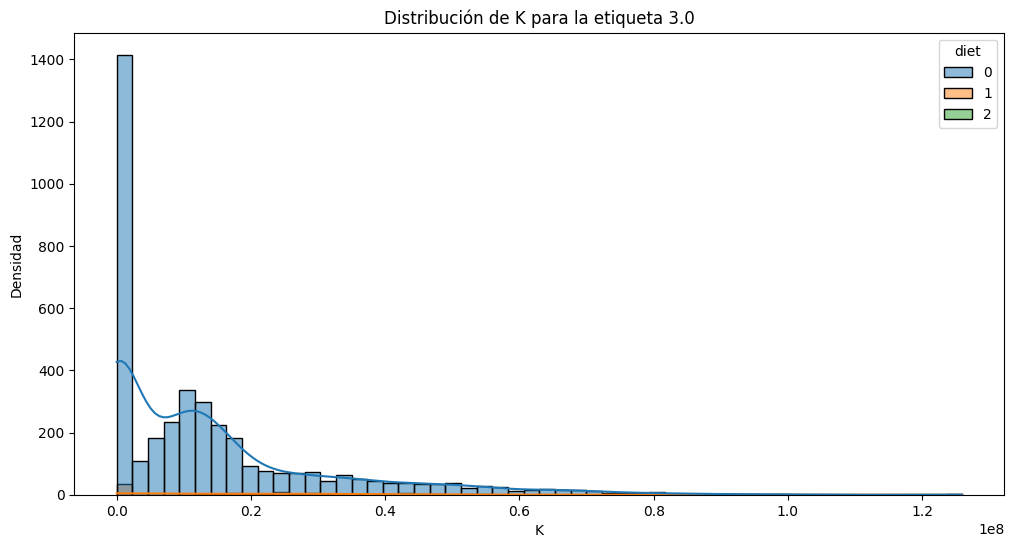

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

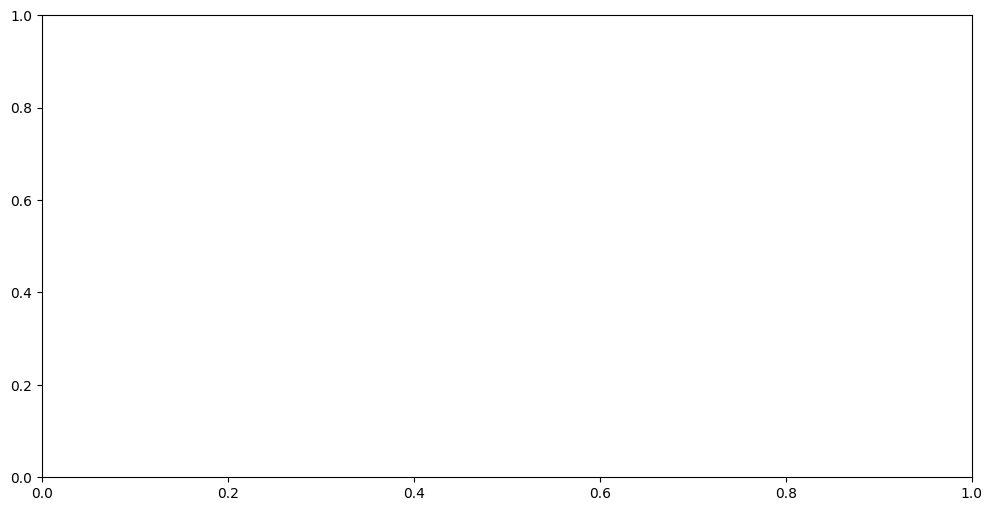

In [32]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='K', hue=df['diet'], kde=True)
    plt.title(f'Distribución de K para la etiqueta {label}')
    plt.xlabel('K')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'Mn' considerando cada etiqueta individualmente

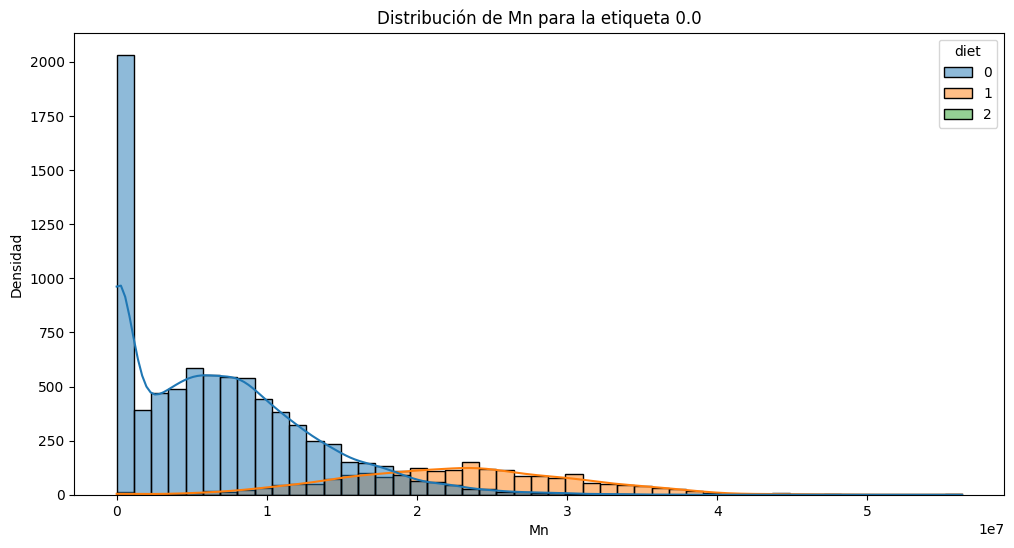

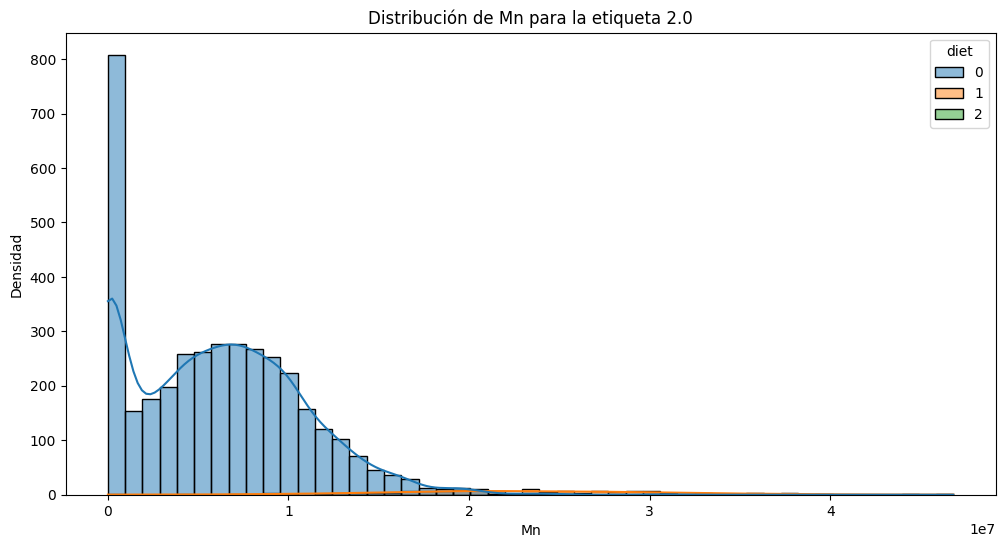

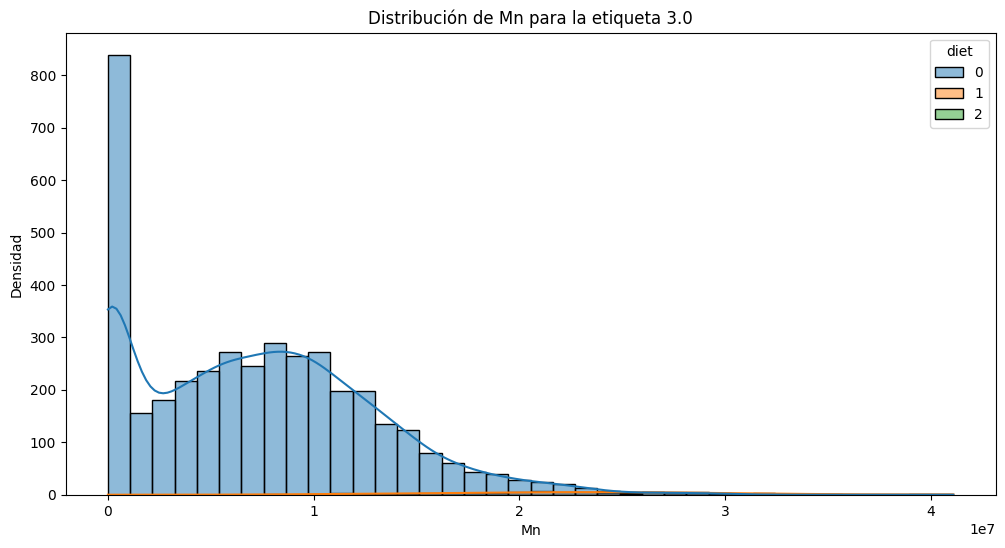

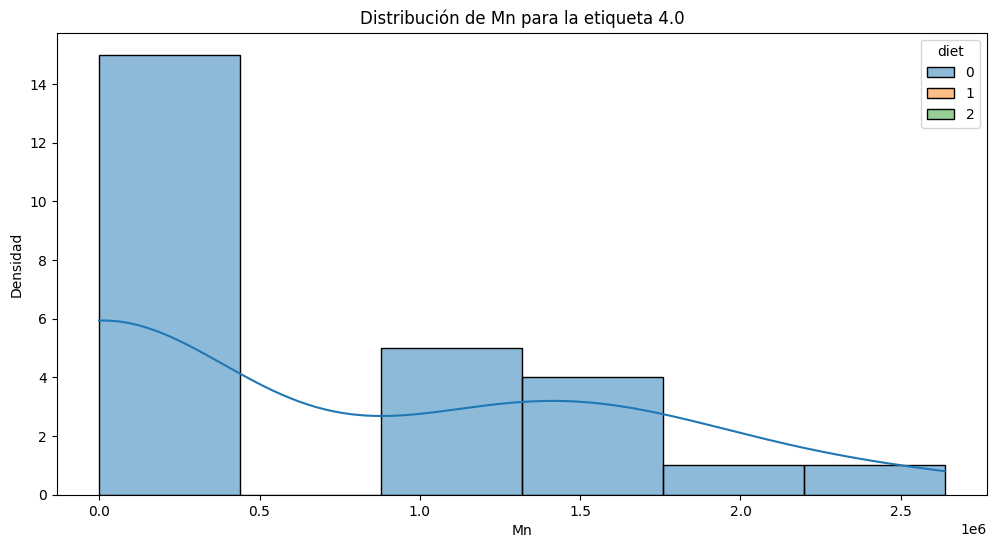

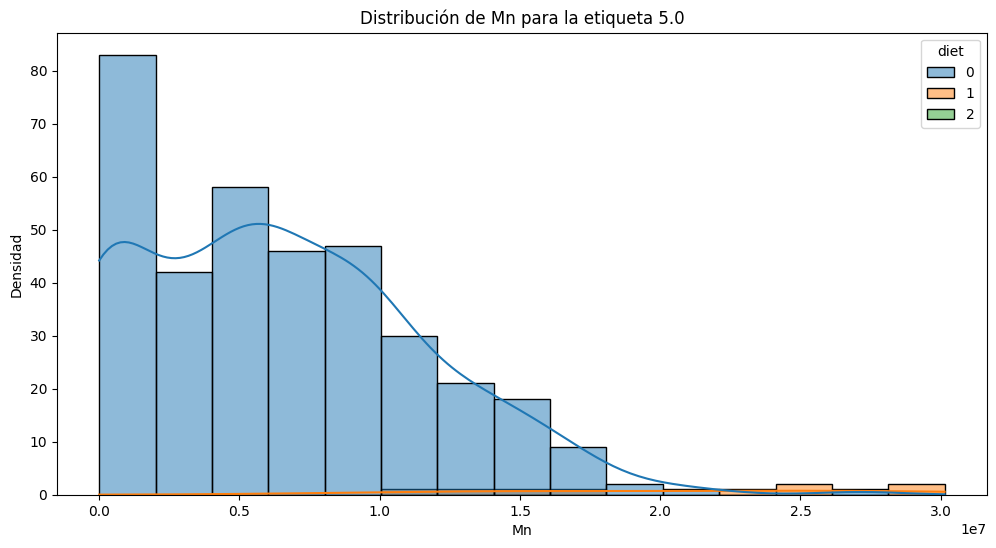

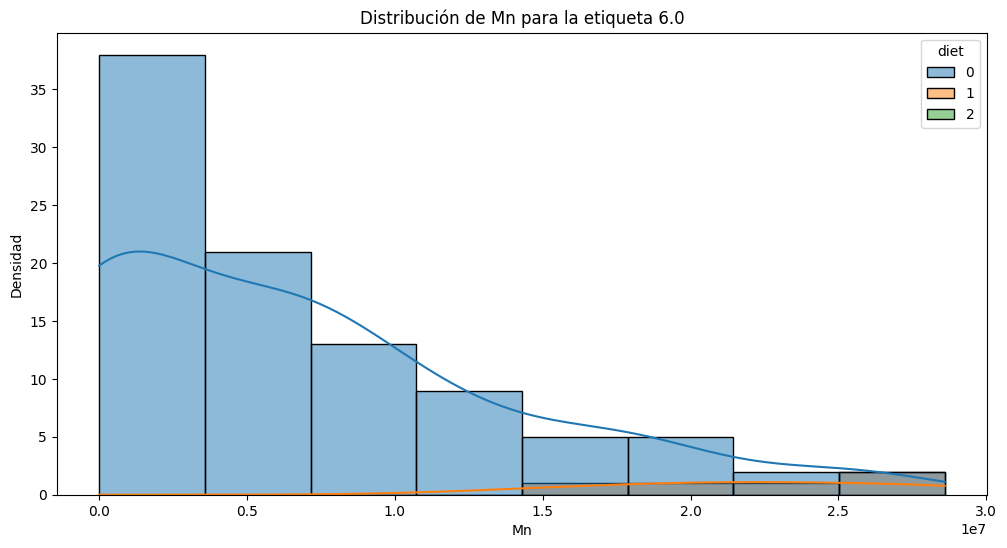

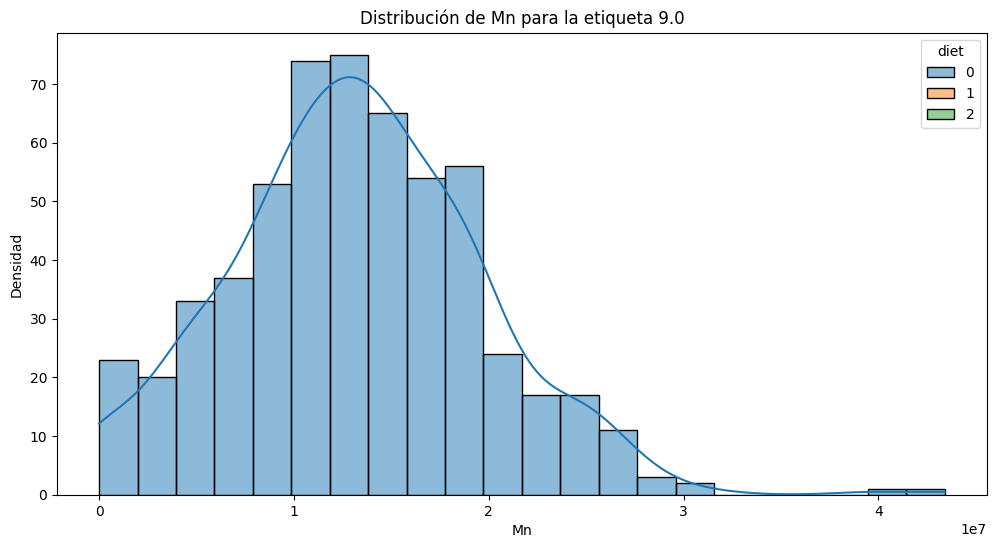

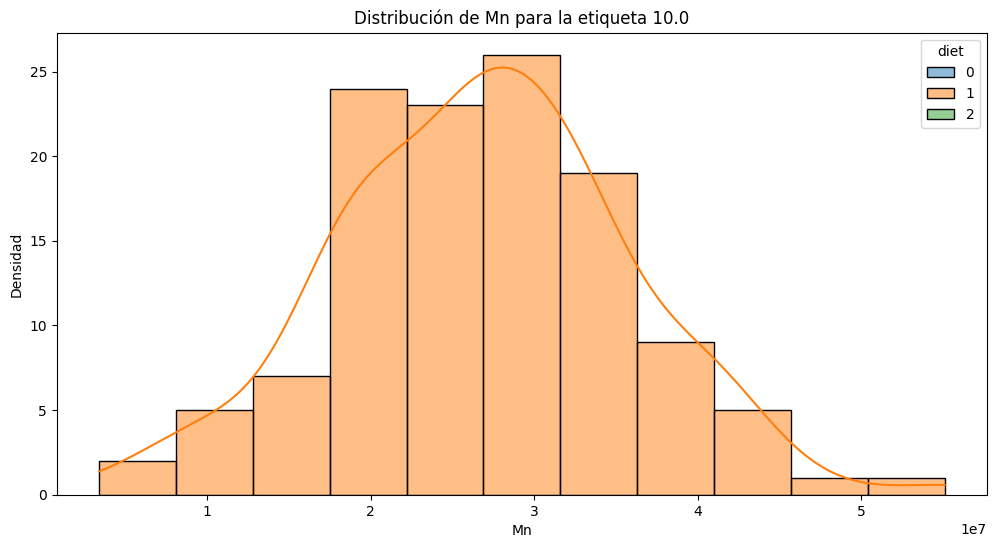

In [33]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='Mn', hue=df['diet'], kde=True)
    plt.title(f'Distribución de Mn para la etiqueta {label}')
    plt.xlabel('Mn')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'P' considerando cada etiqueta individualmente

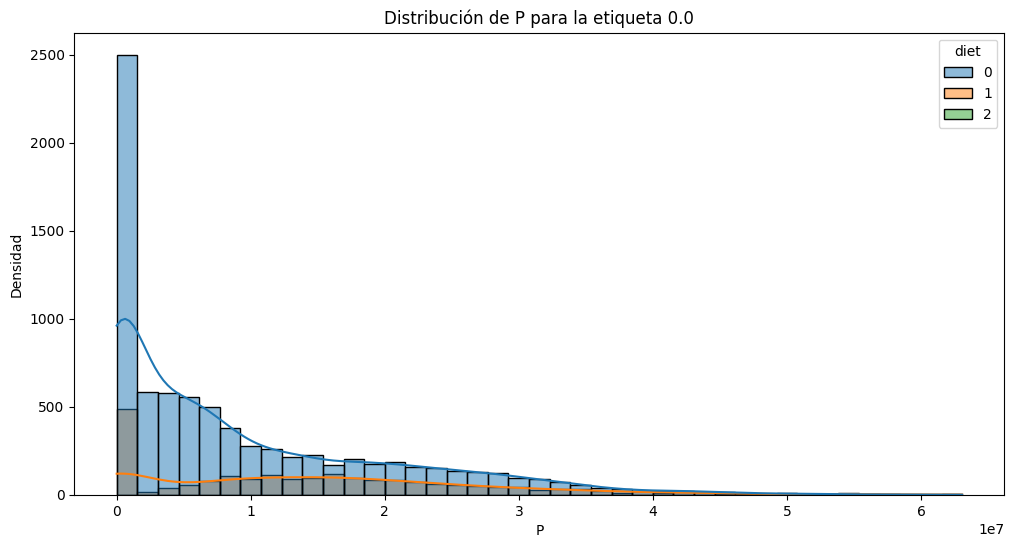

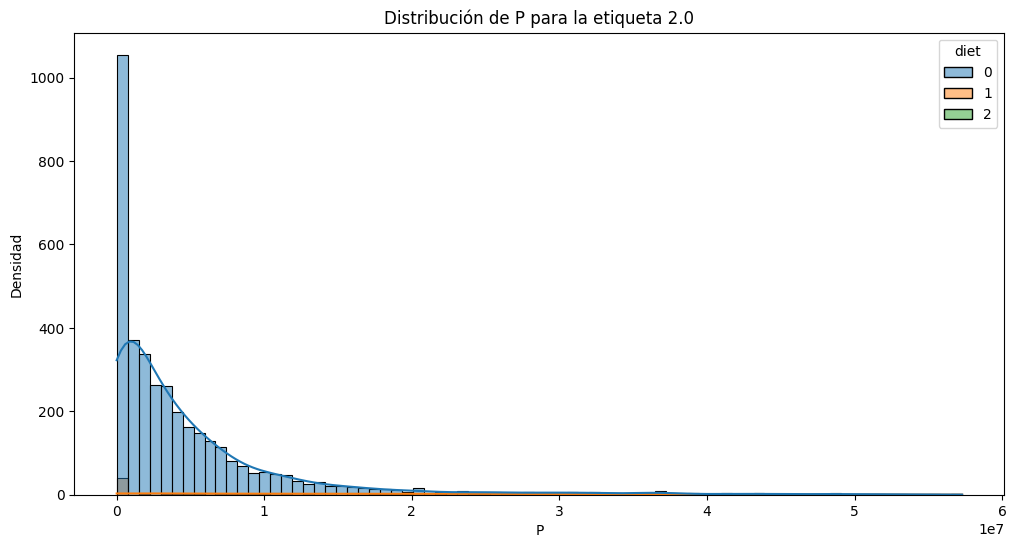

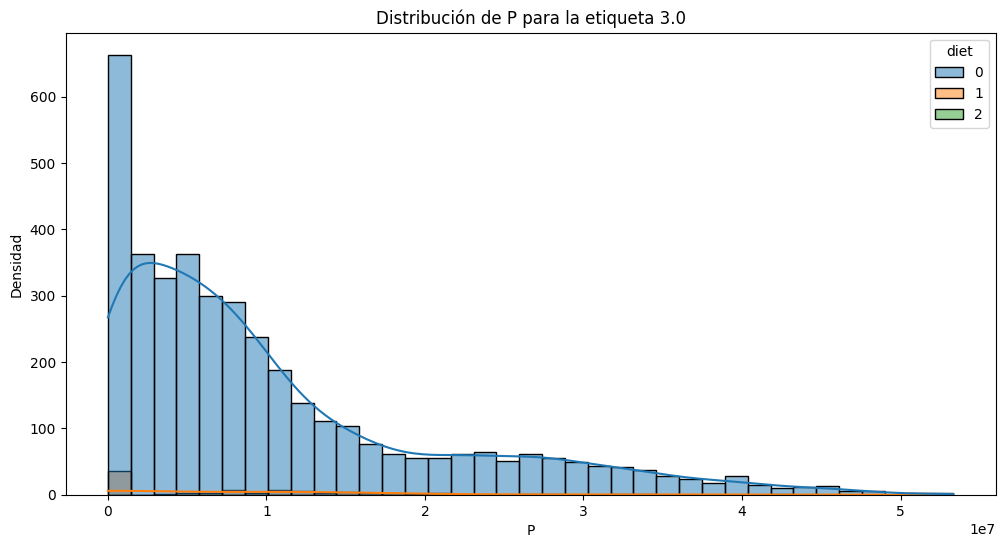

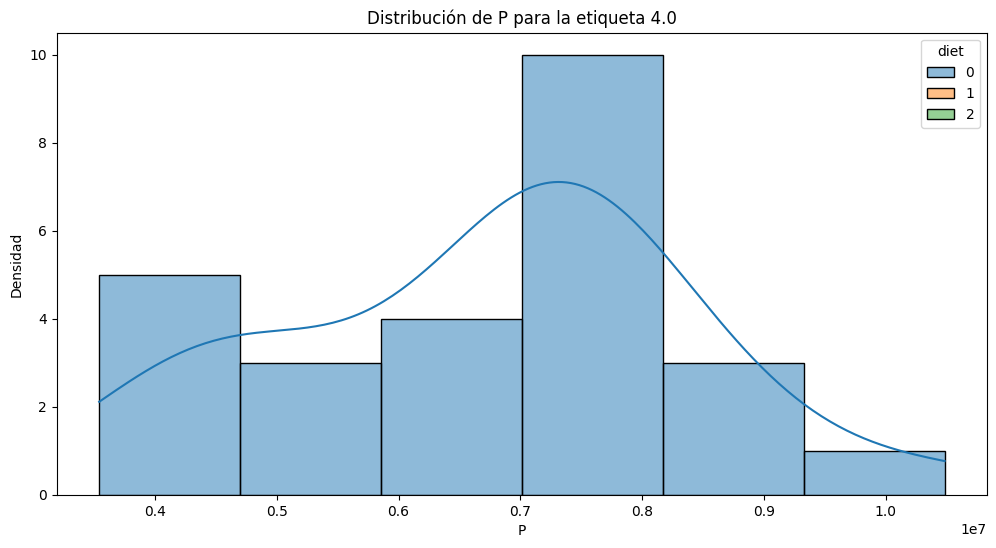

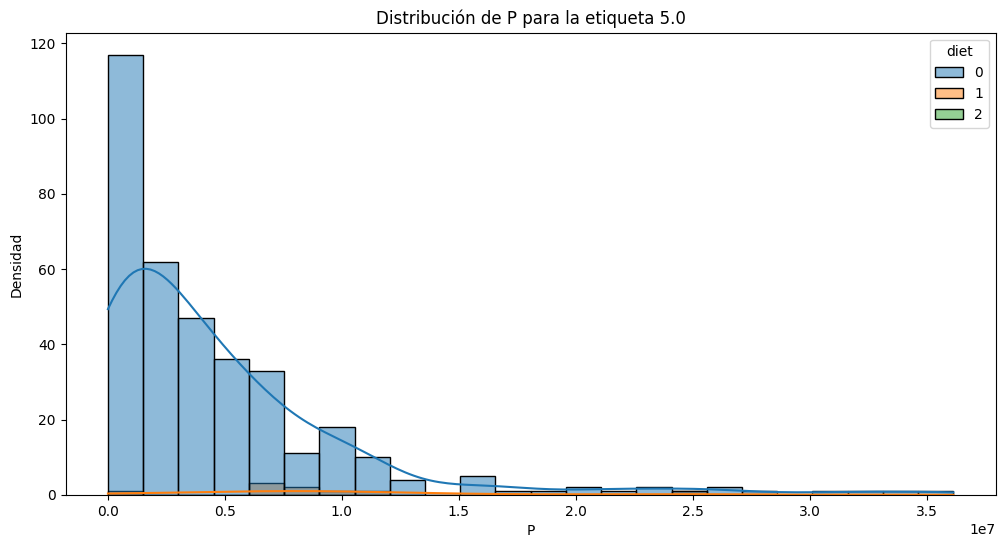

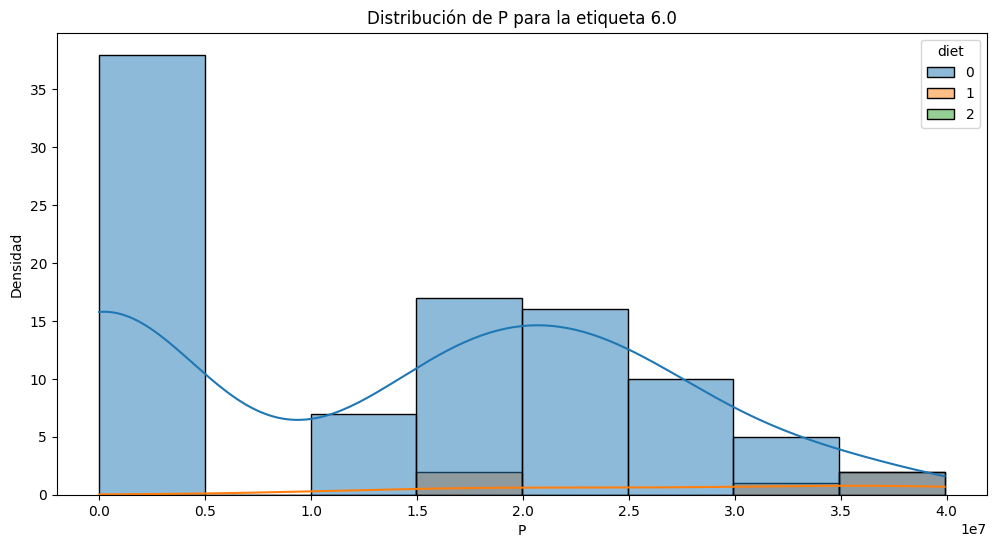

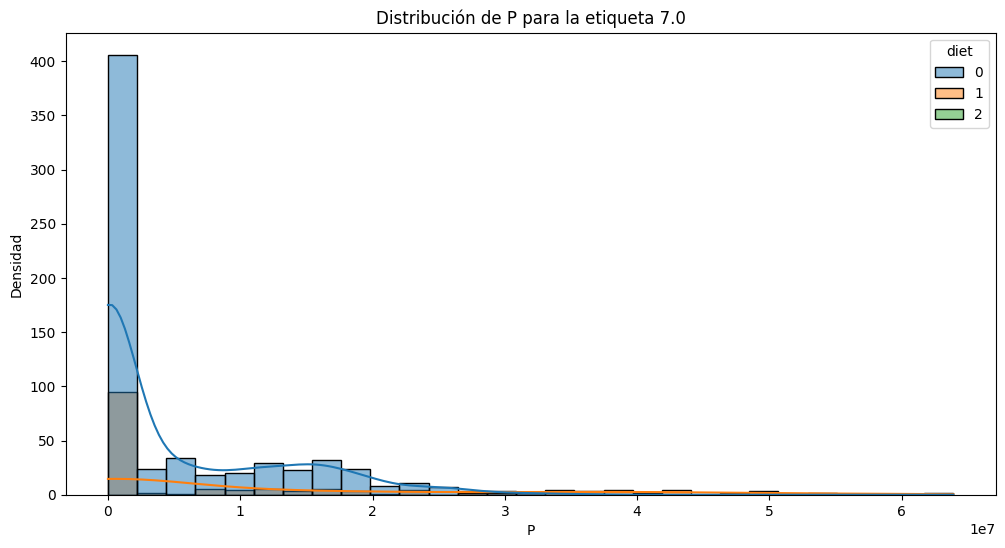

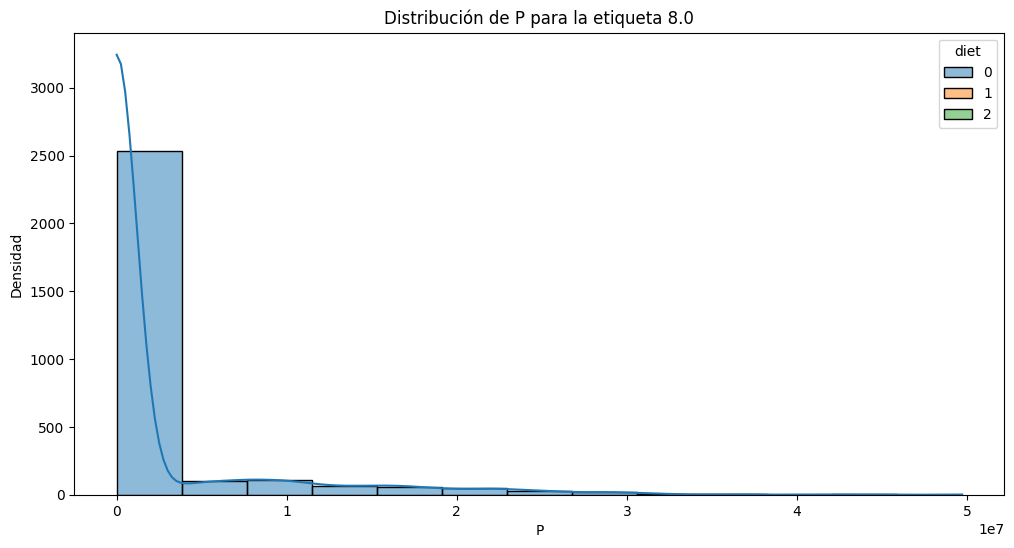

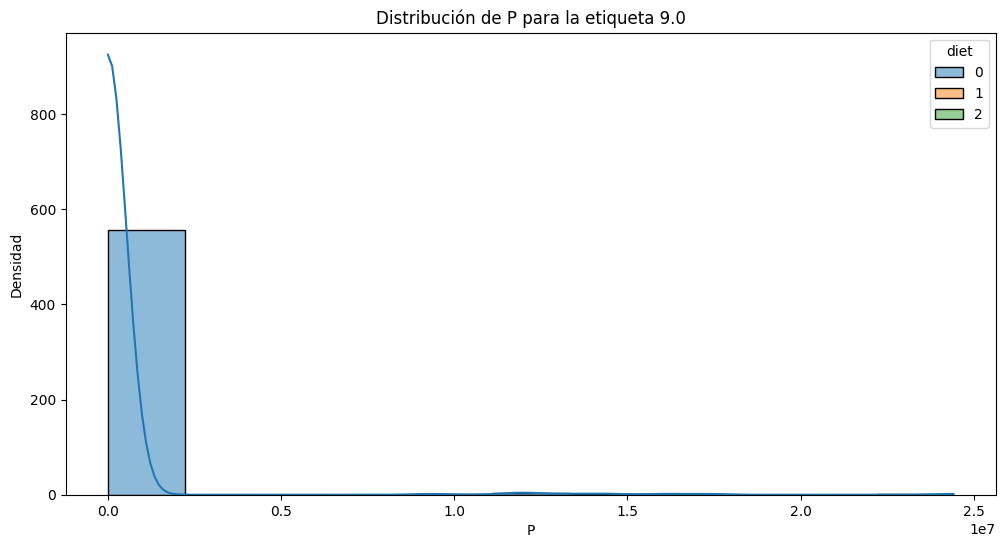

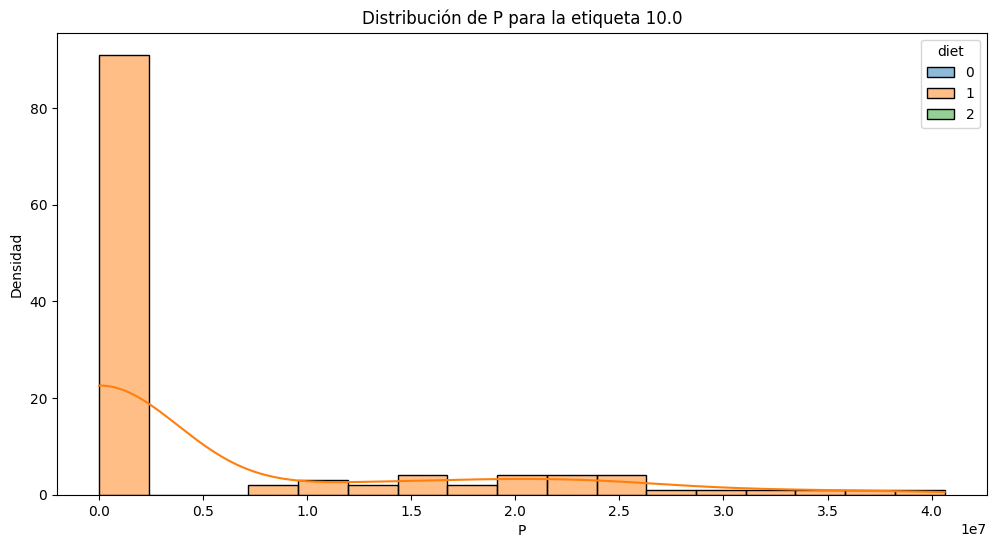

In [34]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='P', hue=df['diet'], kde=True)
    plt.title(f'Distribución de P para la etiqueta {label}')
    plt.xlabel('P')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'S' considerando cada etiqueta individualmente

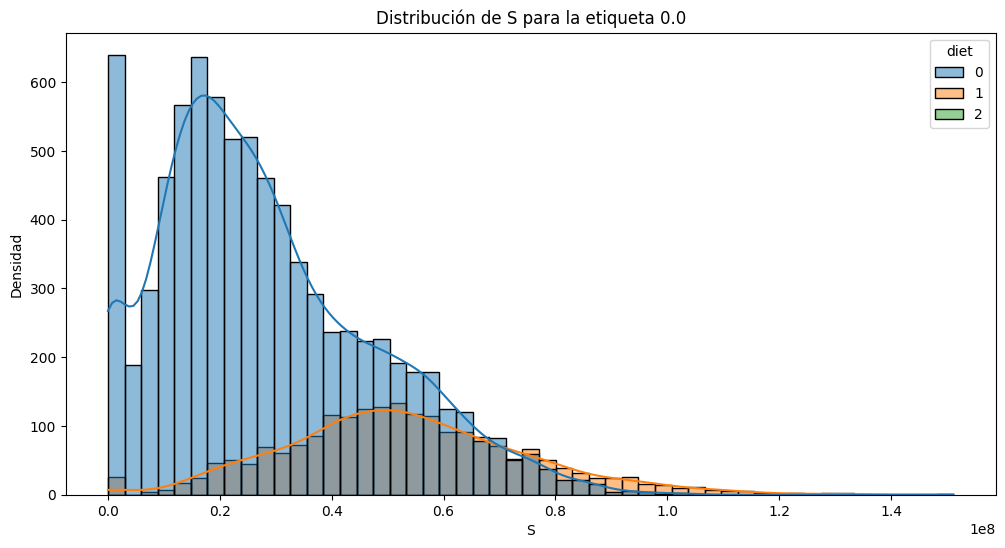

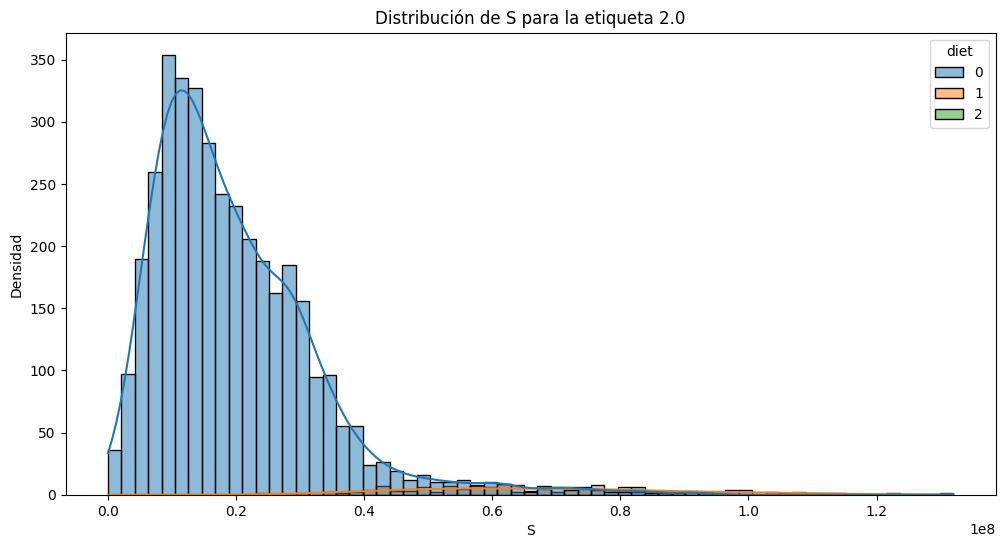

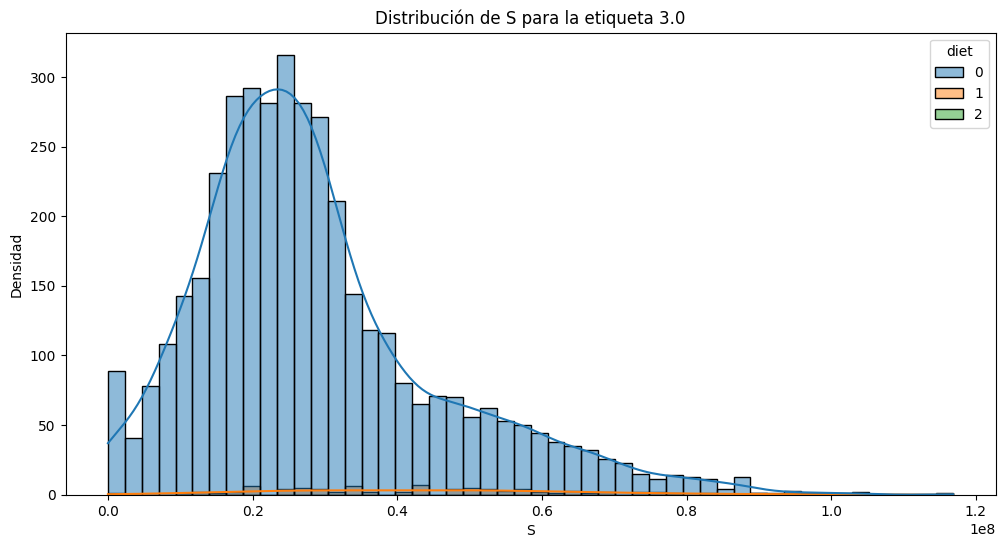

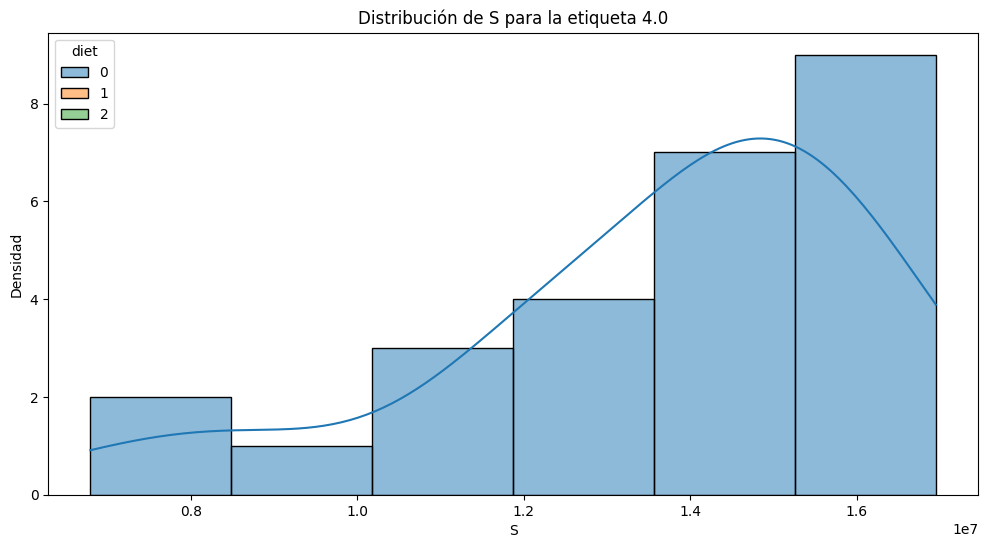

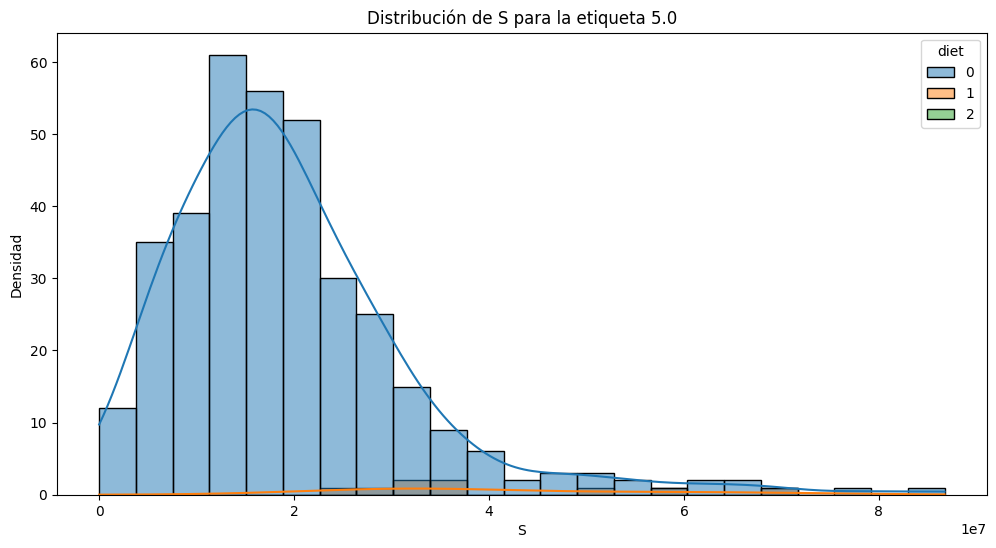

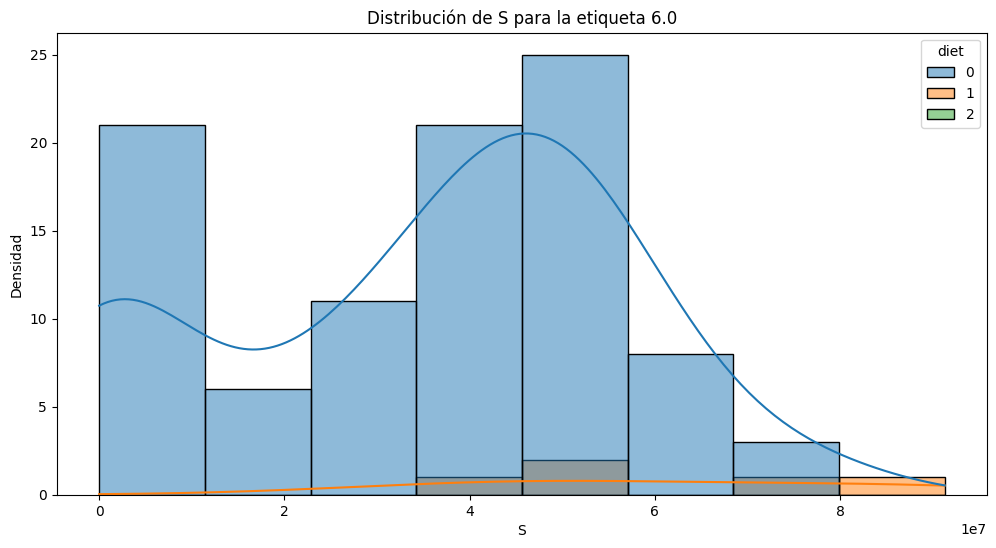

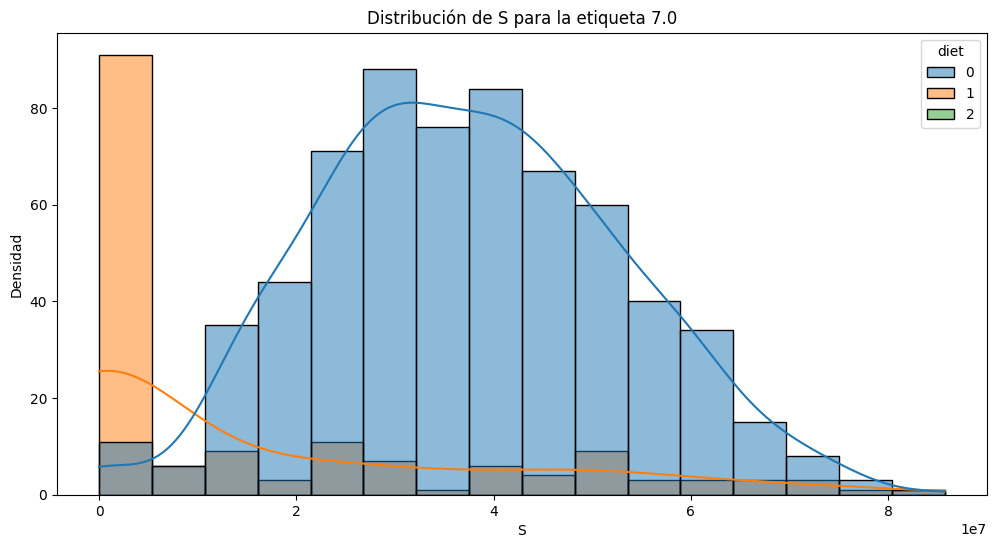

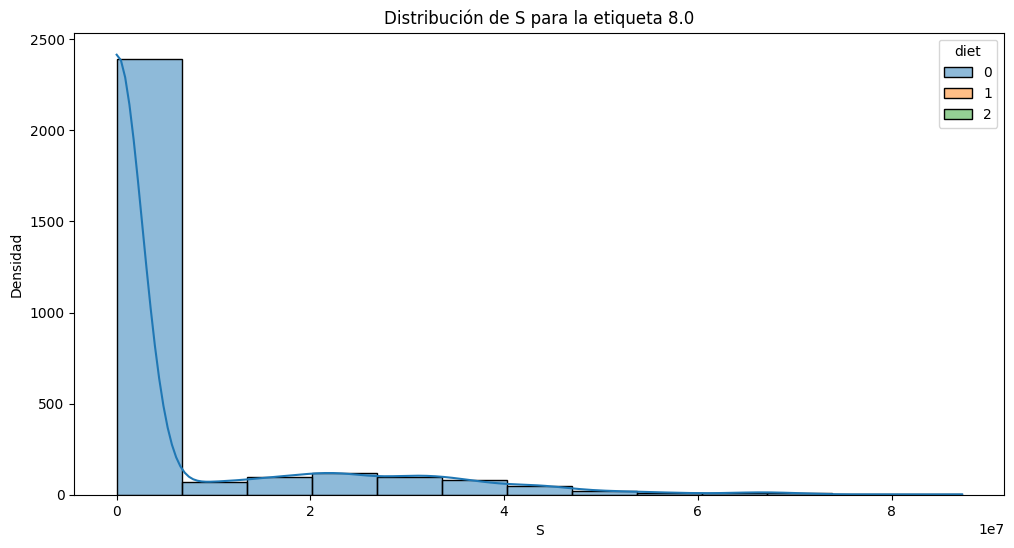

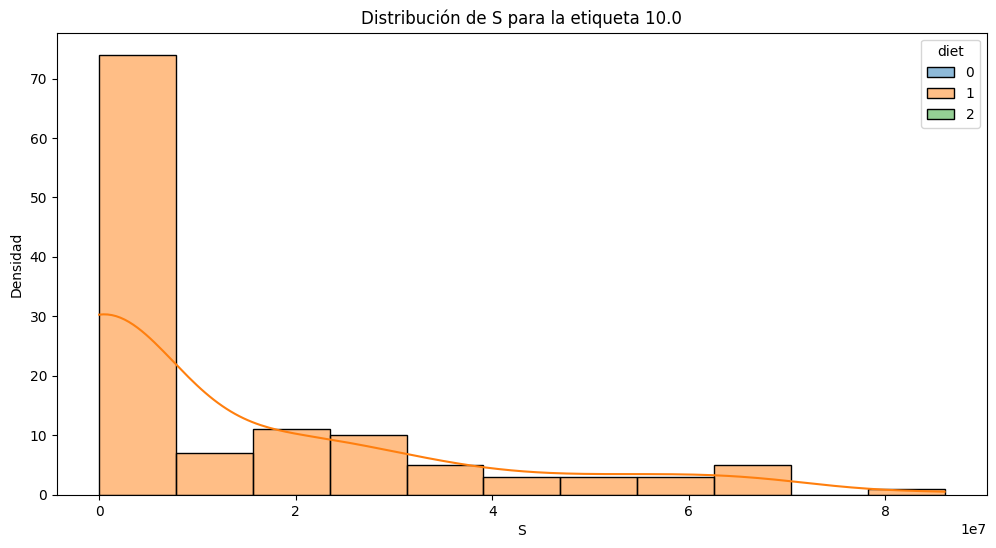

In [35]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='S', hue=df['diet'], kde=True)
    plt.title(f'Distribución de S para la etiqueta {label}')
    plt.xlabel('S')
    plt.ylabel('Densidad')
    plt.show()

# Perfil de distribuciones para cada dieta de 'Zn' considerando cada etiqueta individualmente

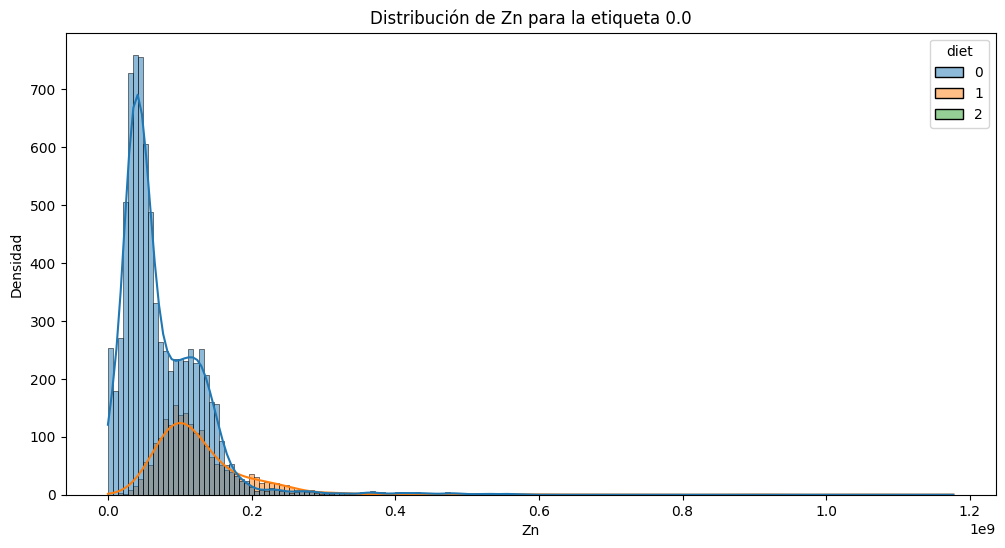

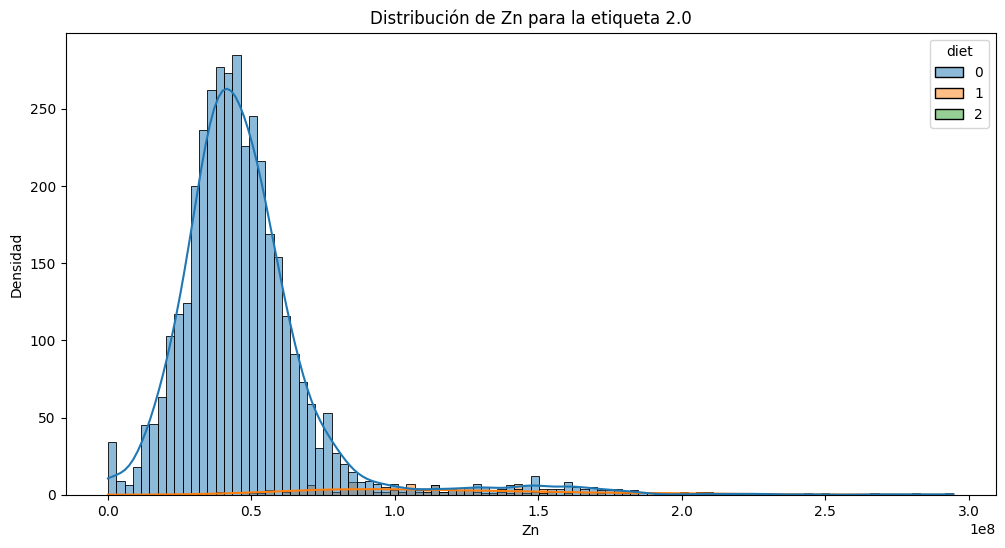

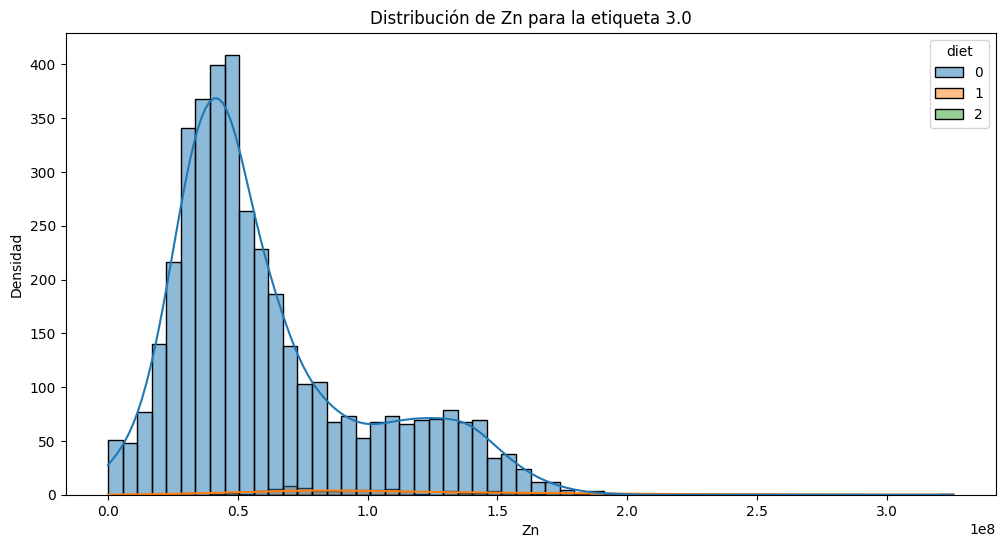

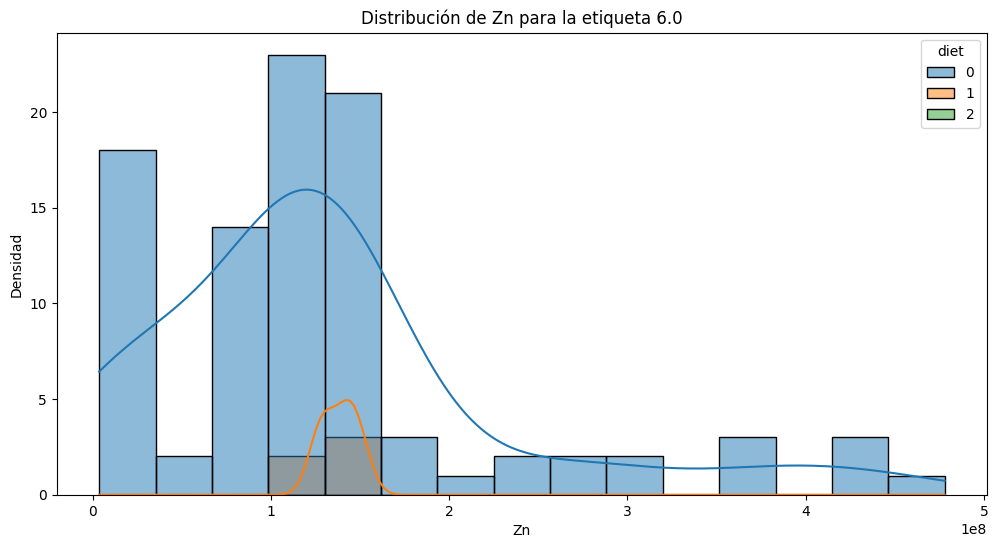

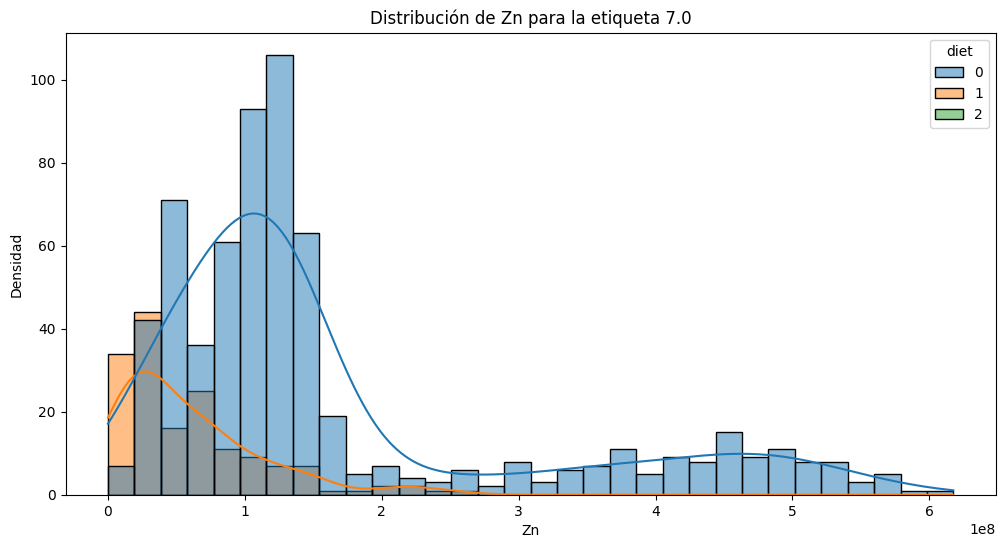

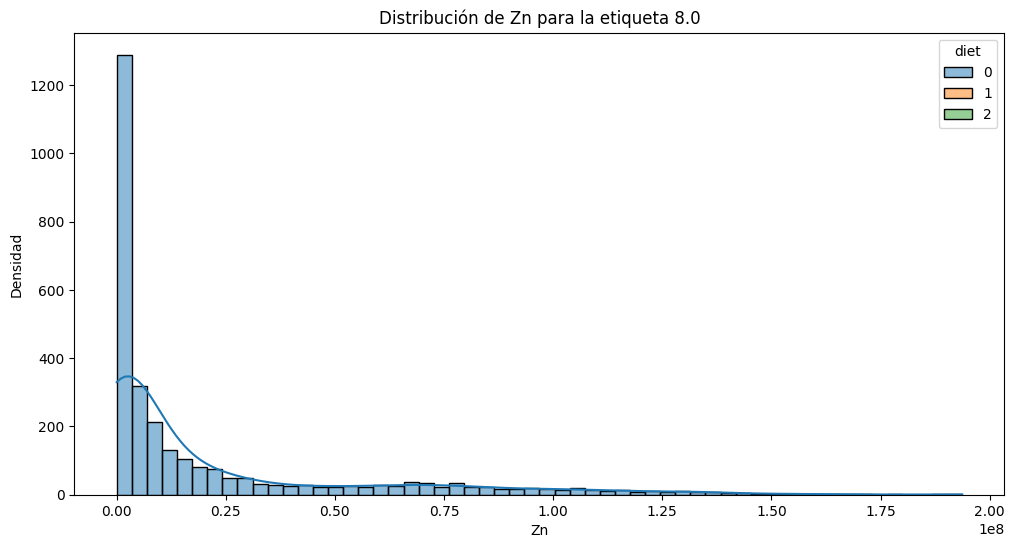

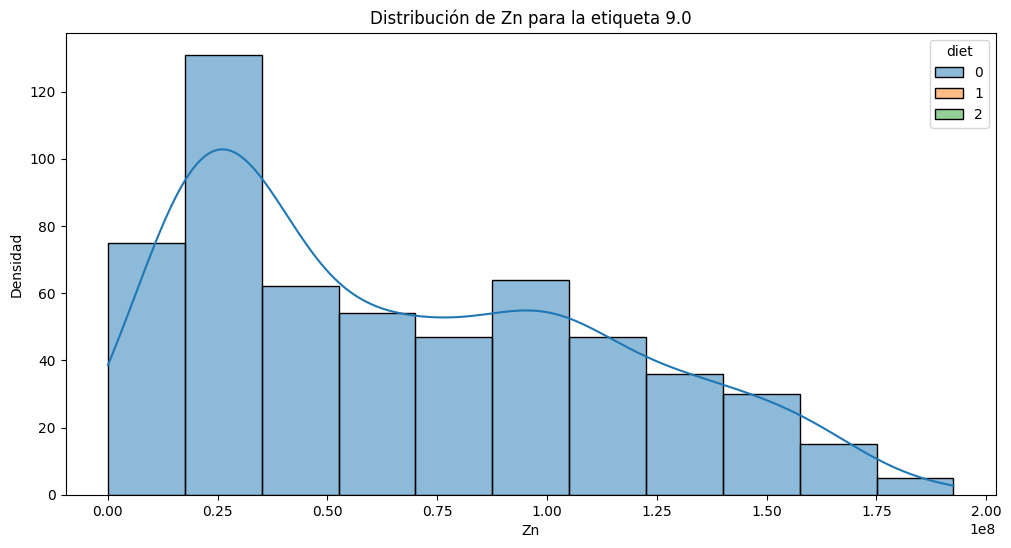

In [36]:
for label in label_unique:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df[df['label']==label], x='Zn', hue=df['diet'], kde=True)
    plt.title(f'Distribución de Zn para la etiqueta {label}')
    plt.xlabel('Zn')
    plt.ylabel('Densidad')
    plt.show()

In [37]:
df

diet  mouse  take  row  col            Ca          Cu           Fe  \
0         2     25     0    0    0  1.518510e+09  15741200.0  102471000.0   
1         2     25     0    0    1  1.575790e+09  11982200.0   92879900.0   
2         2     25     0    0    2  1.658600e+09   8514210.0   99111700.0   
3         2     25     0    0    3  1.636080e+09  10905900.0  126240000.0   
4         2     25     0    0    4  1.488740e+09   1931370.0  113260000.0   
...     ...    ...   ...  ...  ...           ...         ...          ...   
175206    1     27     0   50   46  6.280260e+07   3381110.0   47406700.0   
175207    1     27     0   50   47  3.819870e+07   4133660.0   48250700.0   
175208    1     27     0   50   48  5.272190e+07         0.0   58757300.0   
175209    1     27     0   50   49  2.581320e+07   9649880.0   50104500.0   
175210    1     27     0   50   50  6.215210e+07   9827070.0   43550600.0   

                 K          Mn           P           S          Zn label  
0              0.0  13218900.0  17936300.0         0.0  48648400.0   NaN  
1              0.0   8223780.0  17720300.0  20483800.0  47665200.0   NaN  
2              0.0  10178300.0   9772730.0  24656600.0  44665100.0   NaN  
3       15809100.0  12430100.0   7412260.0   4209910.0  57090400.0   NaN  
4       25747500.0   8511160.0  12054800.0    492790.0  55177500.0   NaN  
...            ...         ...         ...         ...         ...   ...  
175206         0.0  24192700.0         0.0         0.0         0.0   NaN  
175207         0.0  17073800.0         0.0         0.0         0.0   NaN  
175208         0.0  21814700.0         0.0         0.0         0.0   NaN  
175209  15808800.0  21825700.0         0.0         0.0         0.0   NaN  
175210         0.0  13132700.0         0.0         0.0   1681840.0   NaN  

[175211 rows x 14 columns]

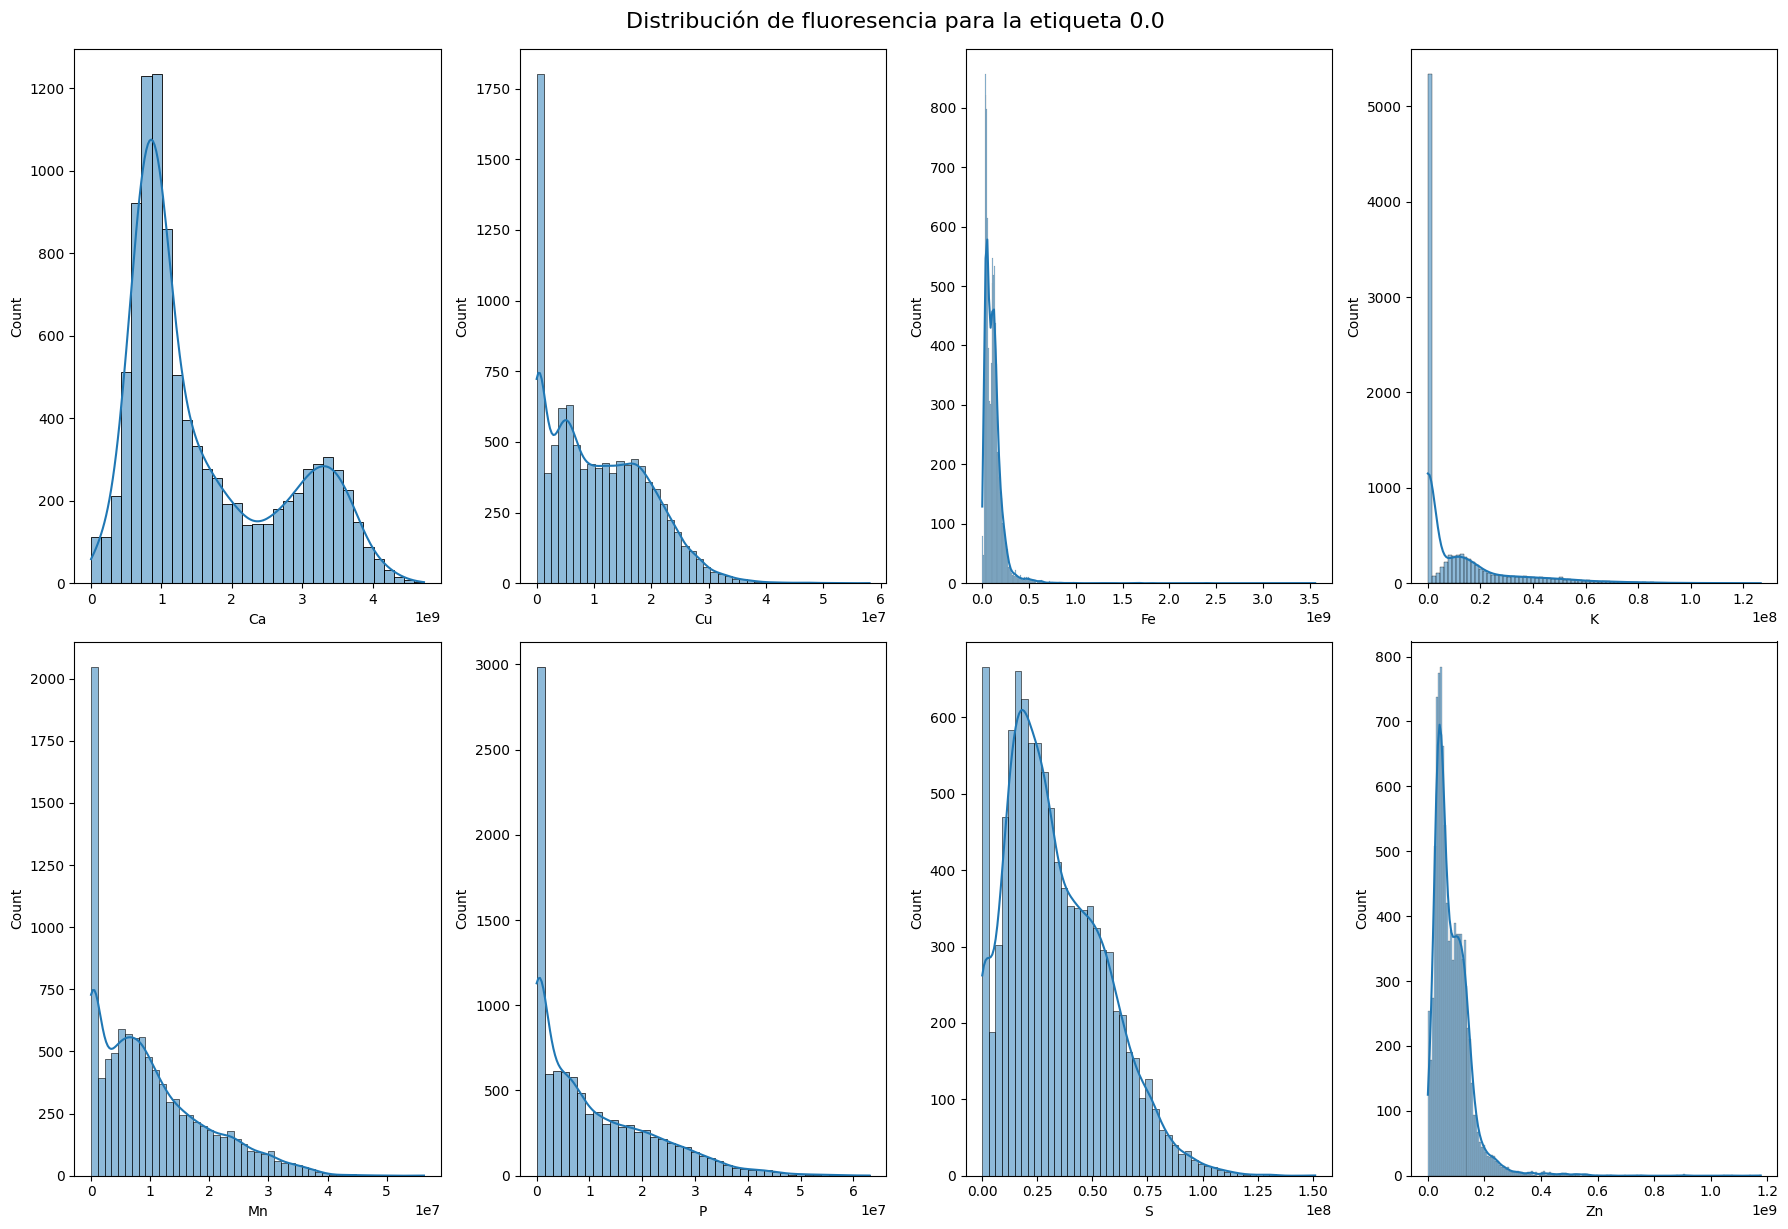

In [45]:
# Boxplots para las variables de interés ['Ca', 'Cu', 'Fe', 'K', 'Mn', 'P','S', 'Zn'] por dieta 

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 12))
sns.histplot(data=df[df['label']==0.0], x='Ca', kde=True, ax=axs[0][0])
sns.histplot(data=df[df['label']==0.0], x='Cu', kde=True, ax=axs[0][1])
sns.histplot(data=df[df['label']==0.0], x='Fe', kde=True, ax=axs[0][2])
sns.histplot(data=df[df['label']==0.0], x='K', kde=True, ax=axs[0][3])
sns.histplot(data=df[df['label']==0.0], x='Mn', kde=True, ax=axs[1][0])
sns.histplot(data=df[df['label']==0.0], x='P', kde=True, ax=axs[1][1])
sns.histplot(data=df[df['label']==0.0], x='S', kde=True, ax=axs[1][2])
sns.histplot(data=df[df['label']==0.0], x='Zn', kde=True, ax=axs[1][3])
plt.tight_layout()
plt.suptitle(f'Distribución de fluoresencia para la etiqueta 0.0', fontsize=16, y=1.02)
plt.show()

In [ ]:
    sns.histplot(data=df[df['label']==label], x='Zn', hue=df[df['label']==label]['diet'], kde=True)
    plt.title(f'Distribución de Zn para la etiqueta {label}')
    plt.xlabel('Zn')
    plt.ylabel('Densidad')
    plt.show()

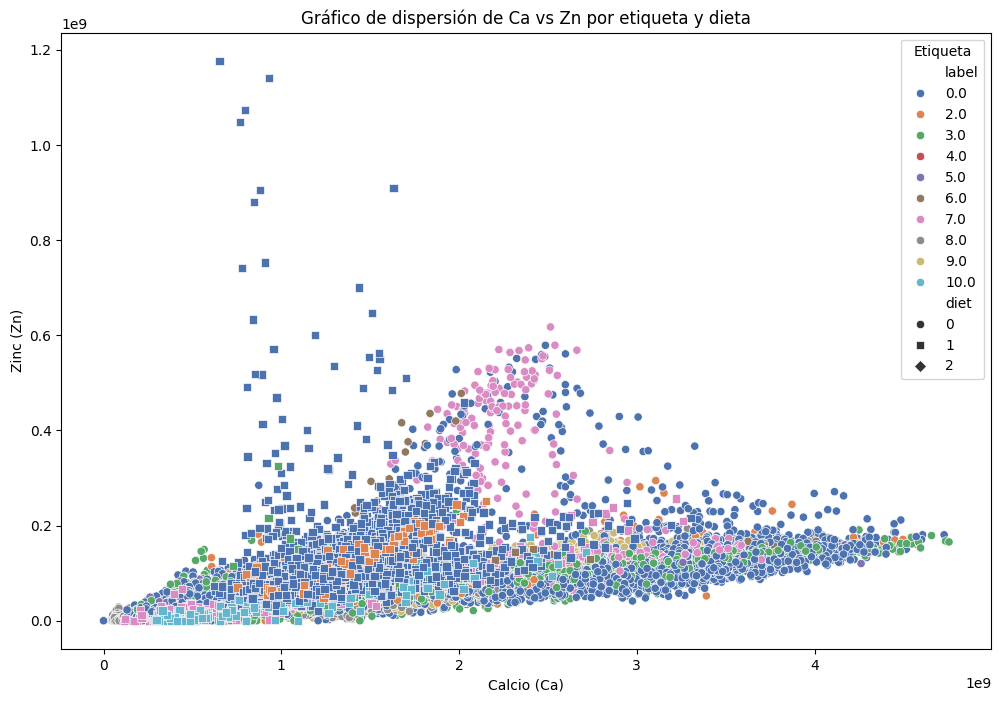

In [ ]:
# Gráfico de dispersión de las variables de interés
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Ca', y='Zn', hue='label', style='diet', palette='deep', markers=['o', 's', 'D'])
plt.title('Gráfico de dispersión de Ca vs Zn por etiqueta y dieta')
plt.xlabel('Calcio (Ca)')
plt.ylabel('Zinc (Zn)')
plt.legend(title='Etiqueta', loc='upper right')
plt.show()


In [15]:
sample_number = 3
element_number = 0

print(f"Take {fluorescence.take[sample_number]} of mouse {fluorescence.mouse[sample_number]}, whose diet was {fluorescence.diet[sample_number]},")
print(f"had the fluorescence of {fluorescence.element_order[element_number]} shown in image \n\n{fluorescence.images[sample_number][element_number]}.")

Take 0 of mouse 15, whose diet was 2,
had the fluorescence of Ca shown in image 

[[3.89817e+08 6.66134e+06 5.79963e+07 1.19037e+07 1.14485e+07 0.00000e+00
  0.00000e+00 2.45958e+07]
 [4.34480e+08 2.88441e+06 6.62135e+07 9.27540e+06 7.71183e+06 0.00000e+00
  0.00000e+00 3.87666e+07]
 [6.30241e+08 9.24821e+06 7.11284e+07 1.74389e+07 6.69054e+06 0.00000e+00
  0.00000e+00 8.81568e+07]
 [6.18219e+08 8.67291e+06 9.23644e+07 1.05607e+07 2.85403e+06 0.00000e+00
  5.14238e+06 9.35630e+07]
 [7.43641e+08 9.85781e+06 7.79961e+07 2.01398e+07 1.25902e+07 0.00000e+00
  0.00000e+00 8.80665e+07]
 [7.40416e+08 1.05889e+07 8.91138e+07 1.03997e+07 1.42377e+07 0.00000e+00
  0.00000e+00 6.43937e+07]
 [9.03072e+08 8.25912e+06 1.06659e+08 2.60079e+07 8.11203e+06 0.00000e+00
  1.20529e+07 7.37300e+07]
 [9.09386e+08 7.67063e+06 1.38071e+08 2.16839e+07 1.80133e+07 0.00000e+00
  1.51914e+07 6.14876e+07]
 [8.39397e+08 8.93640e+06 2.89521e+08 6.95390e+06 1.00973e+07 0.00000e+00
  1.38570e+07 4.06224e+07]
 [9.08875